# Artificial Neural Networks - 02

In [1]:
# Importing necessary libraries
import pandas as pd

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

# Create your first MLP in Keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("forestfires.csv")
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84
dayfri,517.0,0.164410,0.371006,0.0,0.0,0.00,0.00,1.00


In [5]:
data.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,0.019306,...,-0.137044,-0.281535,-0.454771,0.031833,-0.040634,-0.074327,-0.037230,-0.088964,-0.005998,0.076609
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,-0.012010,...,-0.176301,-0.317899,-0.105647,-0.001946,-0.050403,-0.407404,-0.081980,-0.074218,-0.187632,0.110907
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,-0.004220,...,-0.105642,-0.399277,-0.115064,-0.100887,-0.186183,-0.650427,-0.114209,-0.078380,0.093279,0.531857
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.046695,...,-0.162322,-0.249777,-0.103588,0.020982,0.111516,-0.143520,-0.060493,-0.076559,-0.071154,-0.068877
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,-0.071949,...,-0.329648,-0.320015,-0.146520,0.142588,0.051015,-0.341797,-0.045540,-0.053798,-0.053513,0.088006
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,0.064506,...,-0.047714,0.140430,0.170923,0.013185,0.009382,-0.089836,0.086822,-0.035885,-0.072334,-0.062596
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317,0.118090,...,0.269702,-0.029431,-0.070245,-0.040645,0.012124,0.181433,0.015054,0.011864,-0.053850,-0.181476
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366,-0.004261,...,-0.009752,-0.014698,-0.004566,-0.013390,-0.013510,-0.020744,-0.004566,-0.003225,-0.012665,-0.051733
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000,-0.052911,...,0.001010,-0.020732,-0.012589,0.006149,-0.020314,-0.045596,0.006264,-0.008893,-0.016878,0.056573
dayfri,0.019306,-0.012010,-0.004220,0.046695,-0.071949,0.064506,0.118090,-0.004261,-0.052911,1.000000,...,-0.019140,0.046323,-0.027643,-0.048969,0.006000,0.036205,0.056423,-0.019527,-0.045585,0.107671


In [6]:
from sklearn.metrics import classification_report
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['size_category']= label_encoder.fit_transform(data['size_category'])

In [7]:
data=data.drop(columns=['month','day'], axis=1)
data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FFMC           517 non-null    float64
 1   DMC            517 non-null    float64
 2   DC             517 non-null    float64
 3   ISI            517 non-null    float64
 4   temp           517 non-null    float64
 5   RH             517 non-null    int64  
 6   wind           517 non-null    float64
 7   rain           517 non-null    float64
 8   area           517 non-null    float64
 9   dayfri         517 non-null    int64  
 10  daymon         517 non-null    int64  
 11  daysat         517 non-null    int64  
 12  daysun         517 non-null    int64  
 13  daythu         517 non-null    int64  
 14  daytue         517 non-null    int64  
 15  daywed         517 non-null    int64  
 16  monthapr       517 non-null    int64  
 17  monthaug       517 non-null    int64  
 18  monthdec  

In [9]:
x = data.iloc[:,0:-1]
y = data['size_category']

In [10]:
x

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int32

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

## Artificial Neural Network Model - Backpropagation

In [13]:
# create model
model = Sequential()
model.add(Dense(42, input_dim=28, activation='relu'))
model.add(Dense(28, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [14]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
# Fit the model
history=model.fit(x_train,y_train, validation_split=0.33, epochs=180, batch_size=10)

Epoch 1/180
28/28 [==============================] - 20s 35ms/step - loss: 6.4074 - accuracy: 0.5725 - val_loss: 1.4814 - val_accuracy: 0.7445
Epoch 2/180
28/28 [==============================] - 0s 8ms/step - loss: 2.0957 - accuracy: 0.5725 - val_loss: 0.7976 - val_accuracy: 0.7883
Epoch 3/180
28/28 [==============================] - 0s 4ms/step - loss: 0.9216 - accuracy: 0.7101 - val_loss: 0.4359 - val_accuracy: 0.8102
Epoch 4/180
28/28 [==============================] - 0s 4ms/step - loss: 0.4863 - accuracy: 0.7717 - val_loss: 0.2984 - val_accuracy: 0.8686
Epoch 5/180
28/28 [==============================] - 0s 5ms/step - loss: 0.4868 - accuracy: 0.8007 - val_loss: 0.2404 - val_accuracy: 0.9124
Epoch 6/180
28/28 [==============================] - 0s 5ms/step - loss: 0.5948 - accuracy: 0.7536 - val_loss: 0.2877 - val_accuracy: 0.9343
Epoch 7/180
28/28 [==============================] - 0s 4ms/step - loss: 0.4383 - accuracy: 0.8261 - val_loss: 0.2546 - val_accuracy: 0.9416
Epoch 8/180

28/28 [==============================] - 0s 4ms/step - loss: 0.0992 - accuracy: 0.9638 - val_loss: 0.0929 - val_accuracy: 0.9489
Epoch 59/180
28/28 [==============================] - 0s 5ms/step - loss: 0.1045 - accuracy: 0.9601 - val_loss: 0.0719 - val_accuracy: 0.9635
Epoch 60/180
28/28 [==============================] - 0s 5ms/step - loss: 0.1747 - accuracy: 0.9348 - val_loss: 0.0354 - val_accuracy: 0.9854
Epoch 61/180
28/28 [==============================] - 0s 4ms/step - loss: 0.0515 - accuracy: 0.9746 - val_loss: 0.1581 - val_accuracy: 0.9416
Epoch 62/180
28/28 [==============================] - 0s 3ms/step - loss: 0.4214 - accuracy: 0.9130 - val_loss: 0.0452 - val_accuracy: 0.9781
Epoch 63/180
28/28 [==============================] - 0s 4ms/step - loss: 0.2547 - accuracy: 0.9239 - val_loss: 0.1193 - val_accuracy: 0.9489
Epoch 64/180
28/28 [==============================] - 0s 4ms/step - loss: 0.0688 - accuracy: 0.9783 - val_loss: 0.0825 - val_accuracy: 0.9708
Epoch 65/180
28/28 

28/28 [==============================] - 0s 4ms/step - loss: 0.1236 - accuracy: 0.9746 - val_loss: 0.0716 - val_accuracy: 0.9635
Epoch 116/180
28/28 [==============================] - 0s 5ms/step - loss: 0.0197 - accuracy: 0.9964 - val_loss: 0.0950 - val_accuracy: 0.9562
Epoch 117/180
28/28 [==============================] - 0s 5ms/step - loss: 0.0118 - accuracy: 1.0000 - val_loss: 0.0171 - val_accuracy: 0.9927
Epoch 118/180
28/28 [==============================] - 0s 4ms/step - loss: 0.0310 - accuracy: 0.9855 - val_loss: 0.0541 - val_accuracy: 0.9708
Epoch 119/180
28/28 [==============================] - 0s 4ms/step - loss: 0.0171 - accuracy: 0.9928 - val_loss: 0.1616 - val_accuracy: 0.9416
Epoch 120/180
28/28 [==============================] - 0s 4ms/step - loss: 0.1204 - accuracy: 0.9565 - val_loss: 0.1271 - val_accuracy: 0.9489
Epoch 121/180
28/28 [==============================] - 0s 4ms/step - loss: 0.0311 - accuracy: 0.9891 - val_loss: 0.0193 - val_accuracy: 0.9927
Epoch 122/180

28/28 [==============================] - 0s 3ms/step - loss: 0.1525 - accuracy: 0.9638 - val_loss: 0.1497 - val_accuracy: 0.9562
Epoch 173/180
28/28 [==============================] - 0s 3ms/step - loss: 0.0486 - accuracy: 0.9855 - val_loss: 0.0068 - val_accuracy: 1.0000
Epoch 174/180
28/28 [==============================] - 0s 3ms/step - loss: 0.0565 - accuracy: 0.9783 - val_loss: 0.0244 - val_accuracy: 0.9781
Epoch 175/180
28/28 [==============================] - 0s 3ms/step - loss: 0.0743 - accuracy: 0.9855 - val_loss: 0.1226 - val_accuracy: 0.9562
Epoch 176/180
28/28 [==============================] - 0s 3ms/step - loss: 0.0512 - accuracy: 0.9819 - val_loss: 0.1341 - val_accuracy: 0.9562
Epoch 177/180
28/28 [==============================] - 0s 3ms/step - loss: 0.1914 - accuracy: 0.9493 - val_loss: 0.0096 - val_accuracy: 1.0000
Epoch 178/180
28/28 [==============================] - 0s 3ms/step - loss: 0.0149 - accuracy: 1.0000 - val_loss: 0.0951 - val_accuracy: 0.9708
Epoch 179/180

In [16]:
# evaluate the model
scores = model.evaluate(x, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: 0.2149 - accuracy: 0.9458
accuracy: 94.58%


In [17]:
# Visualize training history

# list all data in history
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

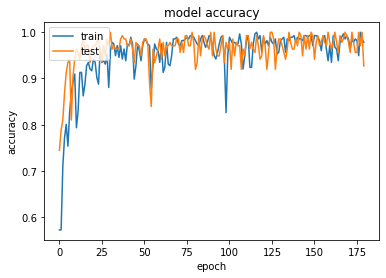

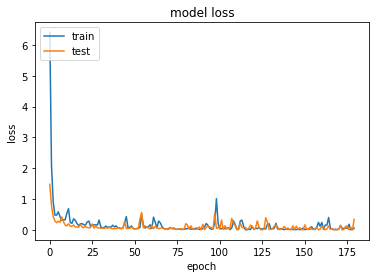

In [18]:
# summarize history for accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Hyper Parameter Tuning

In [19]:
X = data.iloc[:,0:-1]
Y = data['size_category']

In [20]:
# Standardization
from sklearn.preprocessing import StandardScaler
a = StandardScaler()
a.fit(X)
X_standardized = a.transform(X)

In [21]:
pd.DataFrame(X_standardized).describe().T

,count,mean,std,min,25%,50%,75%,max
0,517.0,-1.754024e-15,1.000969,-13.045818,-0.080635,0.173229,0.408960,1.007353
1,517.0,3.070830e-16,1.000969,-1.715608,-0.660665,-0.040203,0.492739,2.819865
2,517.0,7.387171e-17,1.000969,-2.179108,-0.444828,0.469119,0.669663,1.261610
3,517.0,-3.865380e-17,1.000969,-1.980578,-0.553595,-0.136477,0.390409,10.335381
4,517.0,2.005703e-16,1.000969,-2.876943,-0.584238,0.070821,0.674164,2.484195
5,517.0,3.362881e-16,1.000969,-1.796637,-0.692456,-0.140366,0.534411,3.417549
6,517.0,-2.676776e-16,1.000969,-2.021098,-0.736124,-0.009834,0.492982,3.007063
7,517.0,-2.841054e-16,1.000969,-0.073268,-0.073268,-0.073268,-0.073268,21.572284
8,517.0,-1.274502e-16,1.000969,-0.202020,-0.202020,-0.193843,-0.098709,16.951110
9,517.0,4.874674e-17,1.000969,-0.443576,-0.443576,-0.443576,-0.443576,2.254407


## Tuning of Hyperparameters :- Batch Size and Epochs

In [22]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam

In [23]:
# create model
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=28, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [24]:
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,verbose = 10)
grid_result = grid.fit(X_standardized,Y)

<ipython-input-24-8b5395ffc803>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn = create_model,verbose = 0)
C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END .....batch_size=10, epochs=10;, score=1.000 total time=   2.4s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 1/9] END .....batch_size=10, epochs=10;, score=0.808 total time=   1.9s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 1/9] END .....batch_size=10, epochs=10;, score=0.845 total time=   2.2s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 1/9] END .....batch_size=10, epochs=10;, score=0.854 total time=   1.5s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 1/9] END .....batch_size=10, epochs=10;, score=0.864 total time=   1.6s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 2/9] END .....batch_size=10, epochs=50;, score=1.000 total time=   4.0s
[CV 2/5; 2/9] START batch_size=10, epochs=50....................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 2/9] END .....batch_size=10, epochs=50;, score=0.856 total time=   4.0s
[CV 3/5; 2/9] START batch_size=10, epochs=50....................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 2/9] END .....batch_size=10, epochs=50;, score=0.854 total time=   4.6s
[CV 4/5; 2/9] START batch_size=10, epochs=50....................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 2/9] END .....batch_size=10, epochs=50;, score=0.913 total time=   4.1s
[CV 5/5; 2/9] START batch_size=10, epochs=50....................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 2/9] END .....batch_size=10, epochs=50;, score=0.893 total time=   4.4s
[CV 1/5; 3/9] START batch_size=10, epochs=100...................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 3/9] END ....batch_size=10, epochs=100;, score=0.971 total time=   8.1s
[CV 2/5; 3/9] START batch_size=10, epochs=100...................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 3/9] END ....batch_size=10, epochs=100;, score=0.885 total time=   6.6s
[CV 3/5; 3/9] START batch_size=10, epochs=100...................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 3/9] END ....batch_size=10, epochs=100;, score=0.893 total time=   8.9s
[CV 4/5; 3/9] START batch_size=10, epochs=100...................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 3/9] END ....batch_size=10, epochs=100;, score=0.913 total time=   7.2s
[CV 5/5; 3/9] START batch_size=10, epochs=100...................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 3/9] END ....batch_size=10, epochs=100;, score=0.883 total time=   7.8s
[CV 1/5; 4/9] START batch_size=20, epochs=10....................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 4/9] END .....batch_size=20, epochs=10;, score=0.971 total time=   1.5s
[CV 2/5; 4/9] START batch_size=20, epochs=10....................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 4/9] END .....batch_size=20, epochs=10;, score=0.779 total time=   1.2s
[CV 3/5; 4/9] START batch_size=20, epochs=10....................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 4/9] END .....batch_size=20, epochs=10;, score=0.806 total time=   1.2s
[CV 4/5; 4/9] START batch_size=20, epochs=10....................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 4/9] END .....batch_size=20, epochs=10;, score=0.816 total time=   1.2s
[CV 5/5; 4/9] START batch_size=20, epochs=10....................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 4/9] END .....batch_size=20, epochs=10;, score=0.883 total time=   1.2s
[CV 1/5; 5/9] START batch_size=20, epochs=50....................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 5/9] END .....batch_size=20, epochs=50;, score=1.000 total time=   2.3s
[CV 2/5; 5/9] START batch_size=20, epochs=50....................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 5/9] END .....batch_size=20, epochs=50;, score=0.875 total time=   2.3s
[CV 3/5; 5/9] START batch_size=20, epochs=50....................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 5/9] END .....batch_size=20, epochs=50;, score=0.903 total time=   2.4s
[CV 4/5; 5/9] START batch_size=20, epochs=50....................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 5/9] END .....batch_size=20, epochs=50;, score=0.903 total time=   2.7s
[CV 5/5; 5/9] START batch_size=20, epochs=50....................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 5/9] END .....batch_size=20, epochs=50;, score=0.864 total time=   3.4s
[CV 1/5; 6/9] START batch_size=20, epochs=100...................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 6/9] END ....batch_size=20, epochs=100;, score=1.000 total time=   4.0s
[CV 2/5; 6/9] START batch_size=20, epochs=100...................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 6/9] END ....batch_size=20, epochs=100;, score=0.856 total time=   4.4s
[CV 3/5; 6/9] START batch_size=20, epochs=100...................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 6/9] END ....batch_size=20, epochs=100;, score=0.903 total time=   5.6s
[CV 4/5; 6/9] START batch_size=20, epochs=100...................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 6/9] END ....batch_size=20, epochs=100;, score=0.913 total time=   4.3s
[CV 5/5; 6/9] START batch_size=20, epochs=100...................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 6/9] END ....batch_size=20, epochs=100;, score=0.883 total time=   4.6s
[CV 1/5; 7/9] START batch_size=40, epochs=10....................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 7/9] END .....batch_size=40, epochs=10;, score=0.990 total time=   1.1s
[CV 2/5; 7/9] START batch_size=40, epochs=10....................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 7/9] END .....batch_size=40, epochs=10;, score=0.750 total time=   1.5s
[CV 3/5; 7/9] START batch_size=40, epochs=10....................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 7/9] END .....batch_size=40, epochs=10;, score=0.524 total time=   1.3s
[CV 4/5; 7/9] START batch_size=40, epochs=10....................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 7/9] END .....batch_size=40, epochs=10;, score=0.738 total time=   1.1s
[CV 5/5; 7/9] START batch_size=40, epochs=10....................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 7/9] END .....batch_size=40, epochs=10;, score=0.796 total time=   1.1s
[CV 1/5; 8/9] START batch_size=40, epochs=50....................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 8/9] END .....batch_size=40, epochs=50;, score=1.000 total time=   1.8s
[CV 2/5; 8/9] START batch_size=40, epochs=50....................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 8/9] END .....batch_size=40, epochs=50;, score=0.865 total time=   1.7s
[CV 3/5; 8/9] START batch_size=40, epochs=50....................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 8/9] END .....batch_size=40, epochs=50;, score=0.913 total time=   1.8s
[CV 4/5; 8/9] START batch_size=40, epochs=50....................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 8/9] END .....batch_size=40, epochs=50;, score=0.893 total time=   1.8s
[CV 5/5; 8/9] START batch_size=40, epochs=50....................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 8/9] END .....batch_size=40, epochs=50;, score=0.883 total time=   1.8s
[CV 1/5; 9/9] START batch_size=40, epochs=100...................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 9/9] END ....batch_size=40, epochs=100;, score=1.000 total time=   3.0s
[CV 2/5; 9/9] START batch_size=40, epochs=100...................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 9/9] END ....batch_size=40, epochs=100;, score=0.846 total time=   2.8s
[CV 3/5; 9/9] START batch_size=40, epochs=100...................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 9/9] END ....batch_size=40, epochs=100;, score=0.893 total time=   2.7s
[CV 4/5; 9/9] START batch_size=40, epochs=100...................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 9/9] END ....batch_size=40, epochs=100;, score=0.893 total time=   2.6s
[CV 5/5; 9/9] START batch_size=40, epochs=100...................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 9/9] END ....batch_size=40, epochs=100;, score=0.893 total time=   2.6s


In [25]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9109596729278564, using {'batch_size': 20, 'epochs': 100}
0.874159824848175,0.06575292952464279 with: {'batch_size': 10, 'epochs': 10}
0.903192675113678,0.05327866005592461 with: {'batch_size': 10, 'epochs': 50}
0.9090179204940796,0.03277450405090015 with: {'batch_size': 10, 'epochs': 100}
0.8509708762168884,0.06927864815027361 with: {'batch_size': 20, 'epochs': 10}
0.9089805841445923,0.04801900616813698 with: {'batch_size': 20, 'epochs': 50}
0.9109596729278564,0.04857156073100971 with: {'batch_size': 20, 'epochs': 100}
0.759727418422699,0.1486868357499044 with: {'batch_size': 40, 'epochs': 10}
0.9109410047531128,0.047069293909458514 with: {'batch_size': 40, 'epochs': 50}
0.9051530838012696,0.05080393431943396 with: {'batch_size': 40, 'epochs': 100}


## Tuning of Hyperparameters:- Learning rate and Drop out rate

In [26]:
from keras.layers import Dropout

# Defining the model

def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(8,input_dim = 28,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4,input_dim = 28,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,verbose = 10)
grid_result = grid.fit(X_standardized,Y)

<ipython-input-26-0e58917e69d3>:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=1.000 total time=   2.1s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.750 total time=   1.5s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.524 total time=   1.3s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.680 total time=   1.4s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.689 total time=   1.5s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.981 total time=   1.3s
[CV 2/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.750 total time=   1.1s
[CV 3/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.524 total time=   1.3s
[CV 4/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.680 total time=   1.7s
[CV 5/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.796 total time=   1.3s
[CV 1/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.933 total time=   1.2s
[CV 2/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.760 total time=   1.3s
[CV 3/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.786 total time=   1.3s
[CV 4/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.845 total time=   1.2s
[CV 5/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.816 total time=   1.1s
[CV 1/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=1.000 total time=   1.5s
[CV 2/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.750 total time=   2.1s
[CV 3/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.524 total time=   1.5s
[CV 4/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.680 total time=   1.8s
[CV 5/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.699 total time=   1.6s
[CV 1/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.981 total time=   1.8s
[CV 2/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.760 total time=   1.3s
[CV 3/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.524 total time=   1.6s
[CV 4/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.680 total time=   1.6s
[CV 5/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.786 total time=   1.5s
[CV 1/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.788 total time=   1.3s
[CV 2/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.817 total time=   1.1s
[CV 3/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.524 total time=   1.6s
[CV 4/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.748 total time=   1.8s
[CV 5/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.699 total time=   1.3s
[CV 1/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=1.000 total time=   1.3s
[CV 2/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.750 total time=   1.3s
[CV 3/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.524 total time=   2.0s
[CV 4/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.680 total time=   1.3s
[CV 5/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.689 total time=   1.3s
[CV 1/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.933 total time=   1.2s
[CV 2/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.750 total time=   1.4s
[CV 3/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.524 total time=   1.6s
[CV 4/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.738 total time=   1.9s
[CV 5/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.699 total time=   1.9s
[CV 1/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=1.000 total time=   1.2s
[CV 2/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.750 total time=   1.2s
[CV 3/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.524 total time=   1.2s
[CV 4/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.680 total time=   1.2s
[CV 5/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.699 total time=   1.2s


In [27]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.8277819275856018, using {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.7286407709121704,0.1547957721980402 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.7461538434028625,0.14914082238423731 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.8277819275856018,0.059665022267246015 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.74613516330719,0.1486643539514641 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.7153286218643189,0.10349513626461429 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.7286407709121704,0.1547957721980402 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.7287714719772339,0.13024724840552618 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


## Tuning of Hyperparameters:- Activation Function and Kernel Initializer

In [28]:
from keras.layers import Dropout
# Defining the model

def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(8,input_dim = 28,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(4,input_dim = 28,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,verbose = 10)
grid_result = grid.fit(X_standardized,Y)

<ipython-input-28-c1a2ebb86f56>:18: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)
C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=1.000 total time=   2.3s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=0.750 total time=   2.2s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=0.524 total time=   1.8s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=0.320 total time=   2.0s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=0.699 total time=   2.1s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 2/12] END activation_function=softmax, init=normal;, score=0.000 total time=   1.7s
[CV 2/5; 2/12] START activation_function=softmax, init=normal...................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 2/12] END activation_function=softmax, init=normal;, score=0.750 total time=   1.9s
[CV 3/5; 2/12] START activation_function=softmax, init=normal...................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 2/12] END activation_function=softmax, init=normal;, score=0.524 total time=   1.7s
[CV 4/5; 2/12] START activation_function=softmax, init=normal...................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 2/12] END activation_function=softmax, init=normal;, score=0.320 total time=   1.7s
[CV 5/5; 2/12] START activation_function=softmax, init=normal...................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 2/12] END activation_function=softmax, init=normal;, score=0.699 total time=   1.6s
[CV 1/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 3/12] END activation_function=softmax, init=zero;, score=1.000 total time=   1.6s
[CV 2/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 3/12] END activation_function=softmax, init=zero;, score=0.750 total time=   1.3s
[CV 3/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 3/12] END activation_function=softmax, init=zero;, score=0.524 total time=   1.2s
[CV 4/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 3/12] END activation_function=softmax, init=zero;, score=0.680 total time=   1.2s
[CV 5/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 3/12] END activation_function=softmax, init=zero;, score=0.301 total time=   1.2s
[CV 1/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 4/12] END activation_function=relu, init=uniform;, score=1.000 total time=   1.1s
[CV 2/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 4/12] END activation_function=relu, init=uniform;, score=0.750 total time=   1.3s
[CV 3/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 4/12] END activation_function=relu, init=uniform;, score=0.524 total time=   2.3s
[CV 4/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 4/12] END activation_function=relu, init=uniform;, score=0.680 total time=   1.1s
[CV 5/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 4/12] END activation_function=relu, init=uniform;, score=0.699 total time=   1.1s
[CV 1/5; 5/12] START activation_function=relu, init=normal......................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 5/12] END activation_function=relu, init=normal;, score=1.000 total time=   1.1s
[CV 2/5; 5/12] START activation_function=relu, init=normal......................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 5/12] END activation_function=relu, init=normal;, score=0.750 total time=   1.1s
[CV 3/5; 5/12] START activation_function=relu, init=normal......................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 5/12] END activation_function=relu, init=normal;, score=0.524 total time=   1.1s
[CV 4/5; 5/12] START activation_function=relu, init=normal......................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 5/12] END activation_function=relu, init=normal;, score=0.680 total time=   1.3s
[CV 5/5; 5/12] START activation_function=relu, init=normal......................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 5/12] END activation_function=relu, init=normal;, score=0.738 total time=   1.3s
[CV 1/5; 6/12] START activation_function=relu, init=zero........................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 6/12] END activation_function=relu, init=zero;, score=1.000 total time=   1.3s
[CV 2/5; 6/12] START activation_function=relu, init=zero........................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 6/12] END activation_function=relu, init=zero;, score=0.750 total time=   1.4s
[CV 3/5; 6/12] START activation_function=relu, init=zero........................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 6/12] END activation_function=relu, init=zero;, score=0.524 total time=   1.5s
[CV 4/5; 6/12] START activation_function=relu, init=zero........................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 6/12] END activation_function=relu, init=zero;, score=0.680 total time=   1.8s
[CV 5/5; 6/12] START activation_function=relu, init=zero........................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 6/12] END activation_function=relu, init=zero;, score=0.699 total time=   1.2s
[CV 1/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 7/12] END activation_function=tanh, init=uniform;, score=0.981 total time=   1.2s
[CV 2/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 7/12] END activation_function=tanh, init=uniform;, score=0.750 total time=   1.1s
[CV 3/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 7/12] END activation_function=tanh, init=uniform;, score=0.602 total time=   1.8s
[CV 4/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 7/12] END activation_function=tanh, init=uniform;, score=0.680 total time=   1.2s
[CV 5/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 7/12] END activation_function=tanh, init=uniform;, score=0.699 total time=   1.1s
[CV 1/5; 8/12] START activation_function=tanh, init=normal......................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 8/12] END activation_function=tanh, init=normal;, score=1.000 total time=   1.2s
[CV 2/5; 8/12] START activation_function=tanh, init=normal......................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 8/12] END activation_function=tanh, init=normal;, score=0.740 total time=   1.2s
[CV 3/5; 8/12] START activation_function=tanh, init=normal......................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 8/12] END activation_function=tanh, init=normal;, score=0.592 total time=   1.2s
[CV 4/5; 8/12] START activation_function=tanh, init=normal......................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 8/12] END activation_function=tanh, init=normal;, score=0.680 total time=   1.2s
[CV 5/5; 8/12] START activation_function=tanh, init=normal......................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 8/12] END activation_function=tanh, init=normal;, score=0.709 total time=   1.4s
[CV 1/5; 9/12] START activation_function=tanh, init=zero........................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 9/12] END activation_function=tanh, init=zero;, score=1.000 total time=   1.5s
[CV 2/5; 9/12] START activation_function=tanh, init=zero........................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 9/12] END activation_function=tanh, init=zero;, score=0.750 total time=   1.1s
[CV 3/5; 9/12] START activation_function=tanh, init=zero........................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 9/12] END activation_function=tanh, init=zero;, score=0.524 total time=   1.1s
[CV 4/5; 9/12] START activation_function=tanh, init=zero........................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 9/12] END activation_function=tanh, init=zero;, score=0.680 total time=   1.2s
[CV 5/5; 9/12] START activation_function=tanh, init=zero........................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 9/12] END activation_function=tanh, init=zero;, score=0.699 total time=   1.2s
[CV 1/5; 10/12] START activation_function=linear, init=uniform..................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 10/12] END activation_function=linear, init=uniform;, score=0.942 total time=   1.3s
[CV 2/5; 10/12] START activation_function=linear, init=uniform..................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 10/12] END activation_function=linear, init=uniform;, score=0.750 total time=   1.2s
[CV 3/5; 10/12] START activation_function=linear, init=uniform..................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 10/12] END activation_function=linear, init=uniform;, score=0.660 total time=   1.4s
[CV 4/5; 10/12] START activation_function=linear, init=uniform..................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 10/12] END activation_function=linear, init=uniform;, score=0.670 total time=   1.9s
[CV 5/5; 10/12] START activation_function=linear, init=uniform..................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 10/12] END activation_function=linear, init=uniform;, score=0.709 total time=   1.2s
[CV 1/5; 11/12] START activation_function=linear, init=normal...................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 11/12] END activation_function=linear, init=normal;, score=0.990 total time=   1.3s
[CV 2/5; 11/12] START activation_function=linear, init=normal...................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 11/12] END activation_function=linear, init=normal;, score=0.740 total time=   1.6s
[CV 3/5; 11/12] START activation_function=linear, init=normal...................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 11/12] END activation_function=linear, init=normal;, score=0.650 total time=   1.1s
[CV 4/5; 11/12] START activation_function=linear, init=normal...................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 11/12] END activation_function=linear, init=normal;, score=0.680 total time=   1.1s
[CV 5/5; 11/12] START activation_function=linear, init=normal...................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 11/12] END activation_function=linear, init=normal;, score=0.689 total time=   1.1s
[CV 1/5; 12/12] START activation_function=linear, init=zero.....................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 12/12] END activation_function=linear, init=zero;, score=1.000 total time=   1.1s
[CV 2/5; 12/12] START activation_function=linear, init=zero.....................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 12/12] END activation_function=linear, init=zero;, score=0.750 total time=   1.1s
[CV 3/5; 12/12] START activation_function=linear, init=zero.....................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 12/12] END activation_function=linear, init=zero;, score=0.524 total time=   1.1s
[CV 4/5; 12/12] START activation_function=linear, init=zero.....................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 12/12] END activation_function=linear, init=zero;, score=0.680 total time=   1.2s
[CV 5/5; 12/12] START activation_function=linear, init=zero.....................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 12/12] END activation_function=linear, init=zero;, score=0.699 total time=   1.2s


In [29]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.7500373482704162, using {'activation_function': 'linear', 'init': 'normal'}
0.6587378680706024,0.22758449693740784 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.4587378680706024,0.27438996059348447 with: {'activation_function': 'softmax', 'init': 'normal'}
0.650970870256424,0.232809376585483 with: {'activation_function': 'softmax', 'init': 'zero'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'relu', 'init': 'uniform'}
0.7383495092391967,0.15354239422184465 with: {'activation_function': 'relu', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'relu', 'init': 'zero'}
0.7422703504562378,0.12839741946125677 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.7441934227943421,0.13709222273257027 with: {'activation_function': 'tanh', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'tanh', 'init': 'zero'}
0.7462285280227661,0.10304788386344457 with: {'activation

## Tuning of Hyperparameter :-Number of Neurons in activation layer

In [30]:
# Defining the model

def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 28,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters

neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,verbose = 10)
grid_result = grid.fit(X_standardized,Y)

<ipython-input-30-9ee038e68587>:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)
C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 1/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.971 total time=   1.3s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.750 total time=   1.2s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.602 total time=   1.8s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.680 total time=   1.3s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.718 total time=   1.6s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.990 total time=   1.2s
[CV 2/5; 2/9] START neuron1=4, neuron2=4........................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.750 total time=   1.1s
[CV 3/5; 2/9] START neuron1=4, neuron2=4........................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.612 total time=   1.1s
[CV 4/5; 2/9] START neuron1=4, neuron2=4........................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.680 total time=   1.2s
[CV 5/5; 2/9] START neuron1=4, neuron2=4........................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.718 total time=   1.2s
[CV 1/5; 3/9] START neuron1=4, neuron2=8........................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 3/9] END .........neuron1=4, neuron2=8;, score=0.962 total time=   1.1s
[CV 2/5; 3/9] START neuron1=4, neuron2=8........................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 3/9] END .........neuron1=4, neuron2=8;, score=0.750 total time=   1.1s
[CV 3/5; 3/9] START neuron1=4, neuron2=8........................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 3/9] END .........neuron1=4, neuron2=8;, score=0.612 total time=   1.2s
[CV 4/5; 3/9] START neuron1=4, neuron2=8........................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 3/9] END .........neuron1=4, neuron2=8;, score=0.680 total time=   1.2s
[CV 5/5; 3/9] START neuron1=4, neuron2=8........................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 3/9] END .........neuron1=4, neuron2=8;, score=0.718 total time=   1.2s
[CV 1/5; 4/9] START neuron1=8, neuron2=2........................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.933 total time=   1.2s
[CV 2/5; 4/9] START neuron1=8, neuron2=2........................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.750 total time=   1.7s
[CV 3/5; 4/9] START neuron1=8, neuron2=2........................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.592 total time=   1.3s
[CV 4/5; 4/9] START neuron1=8, neuron2=2........................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.689 total time=   2.2s
[CV 5/5; 4/9] START neuron1=8, neuron2=2........................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.680 total time=   1.2s
[CV 1/5; 5/9] START neuron1=8, neuron2=4........................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 5/9] END .........neuron1=8, neuron2=4;, score=0.962 total time=   1.2s
[CV 2/5; 5/9] START neuron1=8, neuron2=4........................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 5/9] END .........neuron1=8, neuron2=4;, score=0.750 total time=   1.2s
[CV 3/5; 5/9] START neuron1=8, neuron2=4........................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 5/9] END .........neuron1=8, neuron2=4;, score=0.602 total time=   1.1s
[CV 4/5; 5/9] START neuron1=8, neuron2=4........................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 5/9] END .........neuron1=8, neuron2=4;, score=0.689 total time=   1.1s
[CV 5/5; 5/9] START neuron1=8, neuron2=4........................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 5/9] END .........neuron1=8, neuron2=4;, score=0.718 total time=   1.1s
[CV 1/5; 6/9] START neuron1=8, neuron2=8........................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 6/9] END .........neuron1=8, neuron2=8;, score=0.962 total time=   1.1s
[CV 2/5; 6/9] START neuron1=8, neuron2=8........................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 6/9] END .........neuron1=8, neuron2=8;, score=0.750 total time=   1.1s
[CV 3/5; 6/9] START neuron1=8, neuron2=8........................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 6/9] END .........neuron1=8, neuron2=8;, score=0.631 total time=   1.6s
[CV 4/5; 6/9] START neuron1=8, neuron2=8........................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 6/9] END .........neuron1=8, neuron2=8;, score=0.680 total time=   1.6s
[CV 5/5; 6/9] START neuron1=8, neuron2=8........................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 6/9] END .........neuron1=8, neuron2=8;, score=0.709 total time=   1.3s
[CV 1/5; 7/9] START neuron1=16, neuron2=2.......................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 7/9] END ........neuron1=16, neuron2=2;, score=0.962 total time=   1.5s
[CV 2/5; 7/9] START neuron1=16, neuron2=2.......................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 7/9] END ........neuron1=16, neuron2=2;, score=0.750 total time=   1.2s
[CV 3/5; 7/9] START neuron1=16, neuron2=2.......................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 7/9] END ........neuron1=16, neuron2=2;, score=0.612 total time=   1.2s
[CV 4/5; 7/9] START neuron1=16, neuron2=2.......................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 7/9] END ........neuron1=16, neuron2=2;, score=0.689 total time=   1.8s
[CV 5/5; 7/9] START neuron1=16, neuron2=2.......................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 7/9] END ........neuron1=16, neuron2=2;, score=0.680 total time=   1.1s
[CV 1/5; 8/9] START neuron1=16, neuron2=4.......................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 8/9] END ........neuron1=16, neuron2=4;, score=0.942 total time=   1.1s
[CV 2/5; 8/9] START neuron1=16, neuron2=4.......................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 8/9] END ........neuron1=16, neuron2=4;, score=0.750 total time=   1.1s
[CV 3/5; 8/9] START neuron1=16, neuron2=4.......................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 8/9] END ........neuron1=16, neuron2=4;, score=0.650 total time=   1.1s
[CV 4/5; 8/9] START neuron1=16, neuron2=4.......................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 8/9] END ........neuron1=16, neuron2=4;, score=0.689 total time=   1.4s
[CV 5/5; 8/9] START neuron1=16, neuron2=4.......................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 8/9] END ........neuron1=16, neuron2=4;, score=0.699 total time=   1.6s
[CV 1/5; 9/9] START neuron1=16, neuron2=8.......................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 9/9] END ........neuron1=16, neuron2=8;, score=0.952 total time=   1.5s
[CV 2/5; 9/9] START neuron1=16, neuron2=8.......................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 9/9] END ........neuron1=16, neuron2=8;, score=0.750 total time=   1.5s
[CV 3/5; 9/9] START neuron1=16, neuron2=8.......................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 9/9] END ........neuron1=16, neuron2=8;, score=0.641 total time=   1.5s
[CV 4/5; 9/9] START neuron1=16, neuron2=8.......................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 9/9] END ........neuron1=16, neuron2=8;, score=0.699 total time=   1.4s
[CV 5/5; 9/9] START neuron1=16, neuron2=8.......................................


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 9/9] END ........neuron1=16, neuron2=8;, score=0.709 total time=   1.4s


In [31]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.7500933527946472, using {'neuron1': 16, 'neuron2': 8}
0.7442307710647583,0.12378528886938153 with: {'neuron1': 4, 'neuron2': 2}
0.7500186681747436,0.12874432472490924 with: {'neuron1': 4, 'neuron2': 4}
0.744249427318573,0.11804566641105504 with: {'neuron1': 4, 'neuron2': 8}
0.7287714600563049,0.11371031865655988 with: {'neuron1': 8, 'neuron2': 2}
0.7442494392395019,0.11931641744643376 with: {'neuron1': 8, 'neuron2': 4}
0.7461911678314209,0.11443591964381561 with: {'neuron1': 8, 'neuron2': 8}
0.7384241819381714,0.11987964277014442 with: {'neuron1': 16, 'neuron2': 2}
0.7462285399436951,0.10304787615697741 with: {'neuron1': 16, 'neuron2': 4}
0.7500933527946472,0.10677378609028061 with: {'neuron1': 16, 'neuron2': 8}


## Training model with optimum values of Hyperparameters


In [33]:
from sklearn.metrics import classification_report, accuracy_score

# Defining the model

def create_model():
    model = Sequential()
    model.add(Dense(16,input_dim = 28,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(4,input_dim = 16,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Fitting the model

model.fit(X_standardized,Y)

# Predicting using trained model

y_predict = model.predict(X_standardized)

# Printing the metrics
print(accuracy_score(Y,y_predict))

<ipython-input-33-311238a2c368>:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)
C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


0.7794970986460348


## Hyperparameters all at once

The hyperparameter optimization was carried out by taking 2 hyperparameters at once. We may have missed the best values. The performance can be further improved by finding the optimum values of hyperparameters all at once given by the code snippet below.

In [34]:
def create_model(learning_rate,dropout_rate,activation_function,init,neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 28,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [35]:
# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0)

<ipython-input-35-f97ff0bacf18>:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn = create_model,verbose = 0)


In [36]:
# Define the grid search parameters

batch_size = [10,20,40]
epochs = [10,50,100]
learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']
neuron1 = [4,8,16]
neuron2 = [2,4,8]

In [37]:
# Make a dictionary of the grid search parameters

param_grids = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,dropout_rate = dropout_rate,
                   activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2)

In [38]:
# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,verbose = 10)
grid_result = grid.fit(X_standardized,Y)

# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Fitting 5 folds for each of 8748 candidates, totalling 43740 fits
[CV 1/5; 1/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 1/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=1.000 total time=   2.2s
[CV 2/5; 1/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 1/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.750 total time=   3.1s
[CV 3/5; 1/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 1/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.524 total time=   1.9s
[CV 4/5; 1/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 1/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.680 total time=   1.5s
[CV 5/5; 1/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 1/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.699 total time=   1.5s
[CV 1/5; 2/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 2/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4;, score=1.000 total time=   1.5s
[CV 2/5; 2/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 2/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.750 total time=   1.5s
[CV 3/5; 2/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 2/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.524 total time=   1.5s
[CV 4/5; 2/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 2/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.680 total time=   1.5s
[CV 5/5; 2/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 2/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.699 total time=   1.6s
[CV 1/5; 3/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 3/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8;, score=1.000 total time=   1.7s
[CV 2/5; 3/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 3/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.750 total time=   2.0s
[CV 3/5; 3/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 3/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.524 total time=   1.7s
[CV 4/5; 3/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 3/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.680 total time=   1.8s
[CV 5/5; 3/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 3/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.699 total time=   1.9s
[CV 1/5; 4/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 4/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2;, score=1.000 total time=   2.2s
[CV 2/5; 4/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 4/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.750 total time=   2.1s
[CV 3/5; 4/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 4/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.524 total time=   2.4s
[CV 4/5; 4/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 4/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.320 total time=   1.8s
[CV 5/5; 4/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 4/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.699 total time=   2.0s
[CV 1/5; 5/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 5/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=1.000 total time=   1.5s
[CV 2/5; 5/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 5/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.750 total time=   1.5s
[CV 3/5; 5/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 5/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.524 total time=   1.5s
[CV 4/5; 5/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 5/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.680 total time=   1.6s
[CV 5/5; 5/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 5/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.699 total time=   1.5s
[CV 1/5; 6/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 6/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=1.000 total time=   1.5s
[CV 2/5; 6/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 6/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.750 total time=   1.6s
[CV 3/5; 6/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 6/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.524 total time=   1.7s
[CV 4/5; 6/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 6/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.680 total time=   2.0s
[CV 5/5; 6/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 6/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.699 total time=   1.5s
[CV 1/5; 7/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 7/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2;, score=1.000 total time=   1.6s
[CV 2/5; 7/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 7/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.750 total time=   1.6s
[CV 3/5; 7/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 7/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.524 total time=   1.6s
[CV 4/5; 7/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 7/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.680 total time=   1.5s
[CV 5/5; 7/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 7/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.699 total time=   2.2s
[CV 1/5; 8/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 8/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4;, score=1.000 total time=   1.9s
[CV 2/5; 8/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 8/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.750 total time=   2.0s
[CV 3/5; 8/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 8/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.524 total time=   2.1s
[CV 4/5; 8/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 8/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.680 total time=   2.0s
[CV 5/5; 8/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 8/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.699 total time=   1.7s
[CV 1/5; 9/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 9/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8;, score=1.000 total time=   1.7s
[CV 2/5; 9/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 9/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.750 total time=   1.6s
[CV 3/5; 9/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 9/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.524 total time=   1.5s
[CV 4/5; 9/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 9/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.680 total time=   1.9s
[CV 5/5; 9/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 9/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.699 total time=   1.8s
[CV 1/5; 10/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 10/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=1.000 total time=   2.1s
[CV 2/5; 10/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 10/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.808 total time=   1.6s
[CV 3/5; 10/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 10/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.893 total time=   1.6s
[CV 4/5; 10/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 10/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.854 total time=   1.6s
[CV 5/5; 10/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 10/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.854 total time=   1.6s
[CV 1/5; 11/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 11/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.981 total time=   2.2s
[CV 2/5; 11/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 11/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.846 total time=   1.5s
[CV 3/5; 11/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 11/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.816 total time=   1.6s
[CV 4/5; 11/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 11/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.835 total time=   1.9s
[CV 5/5; 11/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 11/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.883 total time=   2.0s
[CV 1/5; 12/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 12/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.981 total time=   1.6s
[CV 2/5; 12/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 12/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.808 total time=   1.6s
[CV 3/5; 12/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 12/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.816 total time=   1.6s
[CV 4/5; 12/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 12/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.845 total time=   1.6s
[CV 5/5; 12/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 12/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.854 total time=   1.6s
[CV 1/5; 13/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 13/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.971 total time=   1.6s
[CV 2/5; 13/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 13/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.837 total time=   1.6s
[CV 3/5; 13/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 13/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.835 total time=   1.7s
[CV 4/5; 13/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 13/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.816 total time=   1.9s
[CV 5/5; 13/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 13/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.845 total time=   1.5s
[CV 1/5; 14/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 14/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.952 total time=   1.5s
[CV 2/5; 14/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 14/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.798 total time=   1.5s
[CV 3/5; 14/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 14/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.777 total time=   2.2s
[CV 4/5; 14/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 14/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.806 total time=   1.6s
[CV 5/5; 14/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 14/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.854 total time=   1.6s
[CV 1/5; 15/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 15/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.933 total time=   1.5s
[CV 2/5; 15/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 15/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.788 total time=   1.9s
[CV 3/5; 15/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 15/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.806 total time=   1.9s
[CV 4/5; 15/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 15/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.835 total time=   1.6s
[CV 5/5; 15/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 15/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.883 total time=   1.8s
[CV 1/5; 16/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 16/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.923 total time=   1.7s
[CV 2/5; 16/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 16/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.788 total time=   1.7s
[CV 3/5; 16/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 16/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.757 total time=   1.9s
[CV 4/5; 16/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 16/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.816 total time=   1.9s
[CV 5/5; 16/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 16/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.874 total time=   2.0s
[CV 1/5; 17/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 17/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.913 total time=   2.3s
[CV 2/5; 17/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 17/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.779 total time=   1.6s
[CV 3/5; 17/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 17/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.816 total time=   1.6s
[CV 4/5; 17/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 17/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.845 total time=   1.7s
[CV 5/5; 17/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 17/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.883 total time=   2.5s
[CV 1/5; 18/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 18/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.981 total time=   1.9s
[CV 2/5; 18/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 18/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.769 total time=   1.9s
[CV 3/5; 18/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 18/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.796 total time=   1.9s
[CV 4/5; 18/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 18/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.748 total time=   2.3s
[CV 5/5; 18/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 18/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.874 total time=   1.8s
[CV 1/5; 19/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 19/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.942 total time=   1.8s
[CV 2/5; 19/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 19/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.712 total time=   1.9s
[CV 3/5; 19/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 19/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.796 total time=   1.8s
[CV 4/5; 19/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 19/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.786 total time=   2.0s
[CV 5/5; 19/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 19/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.845 total time=   1.6s
[CV 1/5; 20/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 20/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.990 total time=   1.6s
[CV 2/5; 20/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 20/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.615 total time=   2.5s
[CV 3/5; 20/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 20/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.524 total time=   2.2s
[CV 4/5; 20/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 20/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.718 total time=   2.1s
[CV 5/5; 20/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 20/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.816 total time=   1.8s
[CV 1/5; 21/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 21/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.904 total time=   1.5s
[CV 2/5; 21/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 21/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.798 total time=   2.1s
[CV 3/5; 21/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 21/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.689 total time=   1.6s
[CV 4/5; 21/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 21/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.699 total time=   1.9s
[CV 5/5; 21/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 21/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.631 total time=   2.2s
[CV 1/5; 22/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 22/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.721 total time=   1.6s
[CV 2/5; 22/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 22/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.750 total time=   1.5s
[CV 3/5; 22/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 22/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.524 total time=   1.5s
[CV 4/5; 22/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 22/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.699 total time=   1.6s
[CV 5/5; 22/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 22/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.767 total time=   1.5s
[CV 1/5; 23/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 23/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.817 total time=   1.5s
[CV 2/5; 23/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 23/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.798 total time=   1.5s
[CV 3/5; 23/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 23/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.757 total time=   1.6s
[CV 4/5; 23/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 23/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.728 total time=   2.1s
[CV 5/5; 23/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 23/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.757 total time=   1.8s
[CV 1/5; 24/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 24/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.971 total time=   1.7s
[CV 2/5; 24/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 24/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.760 total time=   1.8s
[CV 3/5; 24/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 24/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.699 total time=   4.9s
[CV 4/5; 24/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 24/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.777 total time=   2.6s
[CV 5/5; 24/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 24/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.796 total time=   1.5s
[CV 1/5; 25/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 25/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.971 total time=   1.7s
[CV 2/5; 25/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 25/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.779 total time=   2.1s
[CV 3/5; 25/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 25/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.641 total time=   1.7s
[CV 4/5; 25/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 25/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.748 total time=   1.6s
[CV 5/5; 25/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 25/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.699 total time=   1.5s
[CV 1/5; 26/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 26/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.971 total time=   1.6s
[CV 2/5; 26/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 26/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.750 total time=   1.6s
[CV 3/5; 26/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 26/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.670 total time=   1.7s
[CV 4/5; 26/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 26/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.738 total time=   2.3s
[CV 5/5; 26/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 26/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.680 total time=   2.1s
[CV 1/5; 27/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 27/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.904 total time=   2.0s
[CV 2/5; 27/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 27/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.760 total time=   2.1s
[CV 3/5; 27/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 27/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.524 total time=   1.7s
[CV 4/5; 27/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 27/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.689 total time=   1.7s
[CV 5/5; 27/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 27/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.573 total time=   1.8s
[CV 1/5; 28/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 28/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=1.000 total time=   2.4s
[CV 2/5; 28/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 28/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.750 total time=   2.0s
[CV 3/5; 28/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 28/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.524 total time=   1.6s
[CV 4/5; 28/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 28/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.680 total time=   1.6s
[CV 5/5; 28/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 28/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.699 total time=   1.5s
[CV 1/5; 29/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 29/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=1.000 total time=   1.6s
[CV 2/5; 29/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 29/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.750 total time=   1.6s
[CV 3/5; 29/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 29/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.524 total time=   1.6s
[CV 4/5; 29/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 29/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.680 total time=   1.9s
[CV 5/5; 29/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 29/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.699 total time=   1.9s
[CV 1/5; 30/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 30/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=1.000 total time=   1.8s
[CV 2/5; 30/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 30/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.750 total time=   1.9s
[CV 3/5; 30/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 30/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.524 total time=   1.9s
[CV 4/5; 30/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 30/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.680 total time=   2.1s
[CV 5/5; 30/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 30/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.699 total time=   2.3s
[CV 1/5; 31/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 31/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.000 total time=   2.0s
[CV 2/5; 31/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 31/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.250 total time=   2.1s
[CV 3/5; 31/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 31/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.524 total time=   3.0s
[CV 4/5; 31/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 31/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.680 total time=   1.5s
[CV 5/5; 31/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 31/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.699 total time=   1.6s
[CV 1/5; 32/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 32/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=1.000 total time=   1.7s
[CV 2/5; 32/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 32/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.750 total time=   1.5s
[CV 3/5; 32/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 32/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.524 total time=   1.5s
[CV 4/5; 32/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 32/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.680 total time=   1.5s
[CV 5/5; 32/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 32/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.699 total time=   1.6s
[CV 1/5; 33/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 33/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8;, score=1.000 total time=   1.5s
[CV 2/5; 33/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 33/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.750 total time=   2.3s
[CV 3/5; 33/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 33/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.524 total time=   2.1s
[CV 4/5; 33/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 33/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.680 total time=   2.1s
[CV 5/5; 33/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 33/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.699 total time=   1.9s
[CV 1/5; 34/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 34/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2;, score=1.000 total time=   1.7s
[CV 2/5; 34/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 34/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.750 total time=   1.6s
[CV 3/5; 34/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 34/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.524 total time=   1.8s
[CV 4/5; 34/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 34/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.320 total time=   1.7s
[CV 5/5; 34/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 34/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.699 total time=   2.7s
[CV 1/5; 35/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 35/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4;, score=1.000 total time=   1.7s
[CV 2/5; 35/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 35/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.750 total time=   1.6s
[CV 3/5; 35/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 35/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.524 total time=   1.6s
[CV 4/5; 35/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 35/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.680 total time=   1.5s
[CV 5/5; 35/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 35/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.699 total time=   1.5s
[CV 1/5; 36/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 36/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8;, score=1.000 total time=   1.5s
[CV 2/5; 36/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 36/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.750 total time=   1.6s
[CV 3/5; 36/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 36/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.524 total time=   1.9s
[CV 4/5; 36/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 36/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.680 total time=   2.1s
[CV 5/5; 36/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 36/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.699 total time=   1.7s
[CV 1/5; 37/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 37/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.962 total time=   1.7s
[CV 2/5; 37/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 37/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.788 total time=   1.8s
[CV 3/5; 37/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 37/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.718 total time=   1.8s
[CV 4/5; 37/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 37/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.835 total time=   1.7s
[CV 5/5; 37/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 37/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.854 total time=   1.6s
[CV 1/5; 38/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 38/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.990 total time=   2.1s
[CV 2/5; 38/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 38/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.837 total time=   1.9s
[CV 3/5; 38/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 38/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.874 total time=   1.8s
[CV 4/5; 38/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 38/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.835 total time=   1.5s
[CV 5/5; 38/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 38/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.893 total time=   1.5s
[CV 1/5; 39/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 39/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.981 total time=   1.5s
[CV 2/5; 39/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 39/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.788 total time=   1.6s
[CV 3/5; 39/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 39/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.796 total time=   1.8s
[CV 4/5; 39/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 39/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.825 total time=   1.6s
[CV 5/5; 39/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 39/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.835 total time=   1.7s
[CV 1/5; 40/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 40/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.990 total time=   1.9s
[CV 2/5; 40/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 40/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.808 total time=   2.4s
[CV 3/5; 40/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 40/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.796 total time=   1.6s
[CV 4/5; 40/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 40/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.816 total time=   1.6s
[CV 5/5; 40/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 40/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.874 total time=   1.6s
[CV 1/5; 41/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 41/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.923 total time=   1.5s
[CV 2/5; 41/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 41/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.788 total time=   1.5s
[CV 3/5; 41/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 41/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.777 total time=   2.2s
[CV 4/5; 41/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 41/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.796 total time=   1.5s
[CV 5/5; 41/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 41/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.845 total time=   2.1s
[CV 1/5; 42/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 42/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.981 total time=   1.5s
[CV 2/5; 42/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 42/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.817 total time=   1.6s
[CV 3/5; 42/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 42/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.825 total time=   1.6s
[CV 4/5; 42/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 42/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.806 total time=   1.7s
[CV 5/5; 42/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 42/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.874 total time=   1.6s
[CV 1/5; 43/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 43/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.952 total time=   1.6s
[CV 2/5; 43/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 43/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.769 total time=   1.6s
[CV 3/5; 43/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 43/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.767 total time=   1.6s
[CV 4/5; 43/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 43/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.796 total time=   2.2s
[CV 5/5; 43/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 43/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.864 total time=   1.6s
[CV 1/5; 44/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 44/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.913 total time=   2.0s
[CV 2/5; 44/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 44/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.808 total time=   2.0s
[CV 3/5; 44/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 44/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.689 total time=   1.9s
[CV 4/5; 44/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 44/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.786 total time=   2.0s
[CV 5/5; 44/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 44/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.854 total time=   2.7s
[CV 1/5; 45/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 45/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.942 total time=   2.2s
[CV 2/5; 45/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 45/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.788 total time=   2.0s
[CV 3/5; 45/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 45/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.777 total time=   1.9s
[CV 4/5; 45/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 45/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.806 total time=   1.6s
[CV 5/5; 45/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 45/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.845 total time=   1.6s
[CV 1/5; 46/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 46/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.942 total time=   1.6s
[CV 2/5; 46/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 46/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.808 total time=   1.6s
[CV 3/5; 46/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 46/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.524 total time=   1.7s
[CV 4/5; 46/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 46/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.680 total time=   1.6s
[CV 5/5; 46/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 46/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.738 total time=   2.4s
[CV 1/5; 47/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 47/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.885 total time=   2.0s
[CV 2/5; 47/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 47/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.731 total time=   1.6s
[CV 3/5; 47/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 47/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.524 total time=   1.7s
[CV 4/5; 47/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 47/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.738 total time=   1.5s
[CV 5/5; 47/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 47/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.825 total time=   1.6s
[CV 1/5; 48/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 48/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.942 total time=   1.7s
[CV 2/5; 48/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 48/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.788 total time=   2.2s
[CV 3/5; 48/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 48/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.631 total time=   1.8s
[CV 4/5; 48/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 48/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.748 total time=   2.0s
[CV 5/5; 48/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 48/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.699 total time=   1.8s
[CV 1/5; 49/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 49/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=1.000 total time=   1.8s
[CV 2/5; 49/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 49/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.779 total time=   1.7s
[CV 3/5; 49/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 49/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.592 total time=   1.7s
[CV 4/5; 49/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 49/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.699 total time=   1.7s
[CV 5/5; 49/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 49/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.757 total time=   1.6s
[CV 1/5; 50/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 50/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.962 total time=   1.7s
[CV 2/5; 50/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 50/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.760 total time=   2.1s
[CV 3/5; 50/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 50/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.524 total time=   1.8s
[CV 4/5; 50/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 50/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.748 total time=   1.6s
[CV 5/5; 50/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 50/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.786 total time=   1.6s
[CV 1/5; 51/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 51/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.981 total time=   1.6s
[CV 2/5; 51/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 51/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.808 total time=   1.5s
[CV 3/5; 51/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 51/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.524 total time=   1.6s
[CV 4/5; 51/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 51/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.728 total time=   2.3s
[CV 5/5; 51/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 51/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.748 total time=   2.2s
[CV 1/5; 52/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 52/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.971 total time=   1.7s
[CV 2/5; 52/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 52/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.760 total time=   2.2s
[CV 3/5; 52/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 52/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.544 total time=   1.9s
[CV 4/5; 52/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 52/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.718 total time=   1.7s
[CV 5/5; 52/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 52/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.641 total time=   1.7s
[CV 1/5; 53/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 53/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.712 total time=   1.8s
[CV 2/5; 53/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 53/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.740 total time=   1.8s
[CV 3/5; 53/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 53/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.524 total time=   2.1s
[CV 4/5; 53/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 53/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.718 total time=   2.1s
[CV 5/5; 53/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 53/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.689 total time=   1.9s
[CV 1/5; 54/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 54/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=8;, score=1.000 total time=   1.7s
[CV 2/5; 54/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 54/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.769 total time=   1.7s
[CV 3/5; 54/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 54/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.650 total time=   1.6s
[CV 4/5; 54/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 54/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.748 total time=   1.5s
[CV 5/5; 54/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 54/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.670 total time=   1.6s
[CV 1/5; 55/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 55/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.000 total time=   2.3s
[CV 2/5; 55/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 55/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.750 total time=   2.3s
[CV 3/5; 55/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 55/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.524 total time=   1.5s
[CV 4/5; 55/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 55/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.680 total time=   1.5s
[CV 5/5; 55/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 55/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.699 total time=   1.5s
[CV 1/5; 56/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 56/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4;, score=1.000 total time=   1.5s
[CV 2/5; 56/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 56/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.750 total time=   1.5s
[CV 3/5; 56/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 56/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.524 total time=   1.5s
[CV 4/5; 56/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 56/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.680 total time=   1.5s
[CV 5/5; 56/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 56/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.699 total time=   1.5s
[CV 1/5; 57/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 57/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8;, score=1.000 total time=   1.8s
[CV 2/5; 57/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 57/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.750 total time=   1.8s
[CV 3/5; 57/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 57/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.524 total time=   1.5s
[CV 4/5; 57/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 57/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.680 total time=   1.5s
[CV 5/5; 57/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 57/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.699 total time=   1.6s
[CV 1/5; 58/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 58/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2;, score=1.000 total time=   1.5s
[CV 2/5; 58/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 58/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.750 total time=   1.7s
[CV 3/5; 58/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 58/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.524 total time=   2.5s
[CV 4/5; 58/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 58/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.320 total time=   1.6s
[CV 5/5; 58/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 58/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.699 total time=   2.1s
[CV 1/5; 59/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 59/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=1.000 total time=   1.6s
[CV 2/5; 59/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 59/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.750 total time=   1.5s
[CV 3/5; 59/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 59/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.524 total time=   1.5s
[CV 4/5; 59/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 59/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.680 total time=   1.6s
[CV 5/5; 59/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 59/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.699 total time=   1.7s
[CV 1/5; 60/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 60/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=8;, score=1.000 total time=   1.8s
[CV 2/5; 60/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 60/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.750 total time=   1.6s
[CV 3/5; 60/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 60/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.524 total time=   1.6s
[CV 4/5; 60/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 60/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.680 total time=   2.0s
[CV 5/5; 60/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 60/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.699 total time=   1.7s
[CV 1/5; 61/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 61/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2;, score=1.000 total time=   1.6s
[CV 2/5; 61/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 61/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.750 total time=   1.6s
[CV 3/5; 61/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 61/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.524 total time=   1.5s
[CV 4/5; 61/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 61/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.680 total time=   2.2s
[CV 5/5; 61/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 61/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.699 total time=   1.5s
[CV 1/5; 62/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 62/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4;, score=1.000 total time=   1.6s
[CV 2/5; 62/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 62/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.750 total time=   1.6s
[CV 3/5; 62/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 62/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.524 total time=   2.1s
[CV 4/5; 62/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 62/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.680 total time=   1.6s
[CV 5/5; 62/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 62/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.699 total time=   1.6s
[CV 1/5; 63/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 63/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8;, score=1.000 total time=   1.5s
[CV 2/5; 63/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 63/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.750 total time=   1.5s
[CV 3/5; 63/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 63/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.524 total time=   1.5s
[CV 4/5; 63/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 63/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.680 total time=   1.6s
[CV 5/5; 63/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 63/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.699 total time=   1.6s
[CV 1/5; 64/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 64/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2;, score=1.000 total time=   1.5s
[CV 2/5; 64/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 64/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.750 total time=   1.8s
[CV 3/5; 64/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 64/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.524 total time=   1.9s
[CV 4/5; 64/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 64/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.680 total time=   1.6s
[CV 5/5; 64/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 64/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.699 total time=   1.5s
[CV 1/5; 65/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 65/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4;, score=1.000 total time=   2.2s
[CV 2/5; 65/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 65/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.750 total time=   1.5s
[CV 3/5; 65/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 65/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.524 total time=   1.5s
[CV 4/5; 65/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 65/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.680 total time=   1.6s
[CV 5/5; 65/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 65/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.699 total time=   1.6s
[CV 1/5; 66/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 66/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8;, score=1.000 total time=   2.1s
[CV 2/5; 66/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 66/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.750 total time=   2.0s
[CV 3/5; 66/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 66/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.524 total time=   2.2s
[CV 4/5; 66/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 66/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.680 total time=   1.9s
[CV 5/5; 66/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 66/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.699 total time=   1.6s
[CV 1/5; 67/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 67/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2;, score=1.000 total time=   1.6s
[CV 2/5; 67/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 67/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.750 total time=   1.5s
[CV 3/5; 67/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 67/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.524 total time=   1.5s
[CV 4/5; 67/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 67/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.680 total time=   1.7s
[CV 5/5; 67/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 67/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.699 total time=   2.0s
[CV 1/5; 68/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 68/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=1.000 total time=   1.5s
[CV 2/5; 68/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 68/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.750 total time=   1.5s
[CV 3/5; 68/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 68/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.524 total time=   2.2s
[CV 4/5; 68/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 68/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.680 total time=   1.5s
[CV 5/5; 68/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 68/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.699 total time=   1.5s
[CV 1/5; 69/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 69/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8;, score=1.000 total time=   1.6s
[CV 2/5; 69/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 69/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.750 total time=   1.5s
[CV 3/5; 69/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 69/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.524 total time=   1.6s
[CV 4/5; 69/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 69/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.680 total time=   2.1s
[CV 5/5; 69/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 69/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.699 total time=   1.5s
[CV 1/5; 70/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 70/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2;, score=1.000 total time=   1.5s
[CV 2/5; 70/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 70/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.750 total time=   1.6s
[CV 3/5; 70/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 70/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.524 total time=   1.6s
[CV 4/5; 70/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 70/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.680 total time=   1.5s
[CV 5/5; 70/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 70/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.699 total time=   1.5s
[CV 1/5; 71/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 71/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4;, score=1.000 total time=   1.5s
[CV 2/5; 71/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 71/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.750 total time=   1.5s
[CV 3/5; 71/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 71/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.524 total time=   2.0s
[CV 4/5; 71/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 71/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.680 total time=   1.7s
[CV 5/5; 71/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 71/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.699 total time=   2.2s
[CV 1/5; 72/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 72/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8;, score=1.000 total time=   1.5s
[CV 2/5; 72/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 72/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.750 total time=   1.6s
[CV 3/5; 72/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 72/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.524 total time=   1.5s
[CV 4/5; 72/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 72/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.680 total time=   1.6s
[CV 5/5; 72/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 72/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.699 total time=   1.6s
[CV 1/5; 73/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 73/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2;, score=1.000 total time=   1.6s
[CV 2/5; 73/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 73/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.750 total time=   2.2s
[CV 3/5; 73/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 73/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.524 total time=   1.6s
[CV 4/5; 73/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 73/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.680 total time=   1.6s
[CV 5/5; 73/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 73/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.699 total time=   2.0s
[CV 1/5; 74/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 74/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4;, score=1.000 total time=   1.6s
[CV 2/5; 74/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 74/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.750 total time=   1.5s
[CV 3/5; 74/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 74/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.524 total time=   1.6s
[CV 4/5; 74/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 74/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.680 total time=   1.5s
[CV 5/5; 74/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 74/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.699 total time=   1.5s
[CV 1/5; 75/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 75/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8;, score=1.000 total time=   2.1s
[CV 2/5; 75/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 75/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.750 total time=   2.2s
[CV 3/5; 75/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 75/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.524 total time=   1.5s
[CV 4/5; 75/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 75/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.680 total time=   1.6s
[CV 5/5; 75/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 75/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.699 total time=   1.5s
[CV 1/5; 76/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 76/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2;, score=1.000 total time=   1.5s
[CV 2/5; 76/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 76/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.750 total time=   1.5s
[CV 3/5; 76/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 76/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.524 total time=   1.6s
[CV 4/5; 76/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 76/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.680 total time=   1.6s
[CV 5/5; 76/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 76/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.699 total time=   1.5s
[CV 1/5; 77/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 77/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=1.000 total time=   1.7s
[CV 2/5; 77/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 77/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.750 total time=   2.1s
[CV 3/5; 77/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 77/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.524 total time=   1.8s
[CV 4/5; 77/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 77/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.680 total time=   1.5s
[CV 5/5; 77/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 77/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.699 total time=   1.5s
[CV 1/5; 78/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 78/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8;, score=1.000 total time=   1.5s
[CV 2/5; 78/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 78/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.750 total time=   1.5s
[CV 3/5; 78/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 78/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.524 total time=   1.5s
[CV 4/5; 78/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 78/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.680 total time=   2.7s
[CV 5/5; 78/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 78/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.699 total time=   1.5s
[CV 1/5; 79/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 79/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2;, score=1.000 total time=   1.6s
[CV 2/5; 79/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 79/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.750 total time=   1.6s
[CV 3/5; 79/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 79/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.524 total time=   1.5s
[CV 4/5; 79/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 79/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.680 total time=   1.6s
[CV 5/5; 79/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 79/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.699 total time=   1.6s
[CV 1/5; 80/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 80/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4;, score=1.000 total time=   1.6s
[CV 2/5; 80/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 80/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.750 total time=   1.5s
[CV 3/5; 80/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 80/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.524 total time=   2.1s
[CV 4/5; 80/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 80/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.680 total time=   1.6s
[CV 5/5; 80/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 80/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.699 total time=   1.6s
[CV 1/5; 81/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 81/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8;, score=1.000 total time=   1.6s
[CV 2/5; 81/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 81/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.750 total time=   1.6s
[CV 3/5; 81/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 81/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.524 total time=   1.5s
[CV 4/5; 81/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 81/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.680 total time=   1.6s
[CV 5/5; 81/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 81/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.699 total time=   1.6s
[CV 1/5; 82/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 82/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.990 total time=   5.2s
[CV 2/5; 82/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 82/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.750 total time=   4.0s
[CV 3/5; 82/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 82/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.524 total time=   4.0s
[CV 4/5; 82/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 82/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.699 total time=   3.9s
[CV 5/5; 82/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 82/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.748 total time=   4.5s
[CV 1/5; 83/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 83/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4;, score=1.000 total time=   3.9s
[CV 2/5; 83/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 83/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.750 total time=   3.9s
[CV 3/5; 83/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 83/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.631 total time=   3.9s
[CV 4/5; 83/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 83/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.728 total time=   4.5s
[CV 5/5; 83/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 83/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.767 total time=   4.0s
[CV 1/5; 84/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 84/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8;, score=1.000 total time=   3.9s
[CV 2/5; 84/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 84/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.750 total time=   4.0s
[CV 3/5; 84/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 84/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.524 total time=   4.3s
[CV 4/5; 84/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 84/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.748 total time=   3.9s
[CV 5/5; 84/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 84/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.767 total time=   3.9s
[CV 1/5; 85/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 85/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2;, score=1.000 total time=   4.2s
[CV 2/5; 85/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 85/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.750 total time=   4.2s
[CV 3/5; 85/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 85/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.524 total time=   4.5s
[CV 4/5; 85/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 85/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.699 total time=   3.8s
[CV 5/5; 85/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 85/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.728 total time=   4.4s
[CV 1/5; 86/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 86/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.981 total time=   4.2s
[CV 2/5; 86/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 86/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.750 total time=   6.3s
[CV 3/5; 86/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 86/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.524 total time=   4.1s
[CV 4/5; 86/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 86/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.699 total time=   4.4s
[CV 5/5; 86/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 86/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.757 total time=   4.0s
[CV 1/5; 87/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 87/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.971 total time=   4.0s
[CV 2/5; 87/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 87/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.750 total time=   4.4s
[CV 3/5; 87/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 87/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.524 total time=   4.0s
[CV 4/5; 87/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 87/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.728 total time=   4.0s
[CV 5/5; 87/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 87/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.738 total time=   4.6s
[CV 1/5; 88/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 88/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.962 total time=   5.3s
[CV 2/5; 88/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 88/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.750 total time=   4.8s
[CV 3/5; 88/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 88/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.650 total time=   5.5s
[CV 4/5; 88/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 88/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.699 total time=   6.2s
[CV 5/5; 88/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 88/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.709 total time=   5.9s
[CV 1/5; 89/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 89/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.981 total time=   4.9s
[CV 2/5; 89/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 89/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.750 total time=   5.2s
[CV 3/5; 89/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 89/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.524 total time=   4.9s
[CV 4/5; 89/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 89/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.728 total time=   6.5s
[CV 5/5; 89/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 89/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.748 total time=   5.8s
[CV 1/5; 90/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 90/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.971 total time=   5.7s
[CV 2/5; 90/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 90/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.750 total time=   6.2s
[CV 3/5; 90/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 90/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.583 total time=   4.7s
[CV 4/5; 90/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 90/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.728 total time=   4.5s
[CV 5/5; 90/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 90/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.728 total time=   5.2s
[CV 1/5; 91/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 91/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.990 total time=   5.4s
[CV 2/5; 91/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 91/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.846 total time=   6.1s
[CV 3/5; 91/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 91/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.971 total time=   5.5s
[CV 4/5; 91/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 91/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.903 total time=   4.7s
[CV 5/5; 91/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 91/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.922 total time=   4.1s
[CV 1/5; 92/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 92/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=1.000 total time=   5.1s
[CV 2/5; 92/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 92/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.856 total time=   5.1s
[CV 3/5; 92/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 92/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.961 total time=   4.9s
[CV 4/5; 92/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 92/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.893 total time=   5.2s
[CV 5/5; 92/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 92/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.854 total time=   4.5s
[CV 1/5; 93/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 93/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8;, score=1.000 total time=   4.0s
[CV 2/5; 93/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 93/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.875 total time=   4.7s
[CV 3/5; 93/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 93/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.961 total time=   5.1s
[CV 4/5; 93/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 93/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.913 total time=   4.6s
[CV 5/5; 93/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 93/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.883 total time=   4.5s
[CV 1/5; 94/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 94/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=1.000 total time=   5.1s
[CV 2/5; 94/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 94/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.846 total time=   4.2s
[CV 3/5; 94/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 94/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.961 total time=   4.2s
[CV 4/5; 94/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 94/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.883 total time=   4.4s
[CV 5/5; 94/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 94/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.913 total time=   4.6s
[CV 1/5; 95/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 95/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.990 total time=   4.6s
[CV 2/5; 95/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 95/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.817 total time=   4.4s
[CV 3/5; 95/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 95/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.874 total time=   4.6s
[CV 4/5; 95/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 95/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.903 total time=   5.6s
[CV 5/5; 95/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 95/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.903 total time=   4.0s
[CV 1/5; 96/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 96/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.981 total time=   4.3s
[CV 2/5; 96/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 96/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.837 total time=   4.8s
[CV 3/5; 96/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 96/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.903 total time=   4.0s
[CV 4/5; 96/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 96/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.883 total time=   4.1s
[CV 5/5; 96/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 96/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.922 total time=   5.4s
[CV 1/5; 97/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 97/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2;, score=1.000 total time=   4.5s
[CV 2/5; 97/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 97/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.846 total time=   5.9s
[CV 3/5; 97/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 97/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.854 total time=   5.7s
[CV 4/5; 97/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 97/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.816 total time=   4.6s
[CV 5/5; 97/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 97/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.854 total time=   4.5s
[CV 1/5; 98/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 98/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.971 total time=   5.0s
[CV 2/5; 98/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 98/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.856 total time=   4.8s
[CV 3/5; 98/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 98/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.942 total time=   6.0s
[CV 4/5; 98/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 98/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.854 total time=   9.0s
[CV 5/5; 98/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 98/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.835 total time=  10.6s
[CV 1/5; 99/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 99/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.990 total time=   6.0s
[CV 2/5; 99/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 99/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.798 total time=   4.3s
[CV 3/5; 99/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 99/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.874 total time=   4.4s
[CV 4/5; 99/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 99/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.864 total time=   4.2s
[CV 5/5; 99/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 99/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.816 total time=   4.1s
[CV 1/5; 100/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 100/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.904 total time=   4.0s
[CV 2/5; 100/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 100/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.817 total time=   4.0s
[CV 3/5; 100/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 100/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.602 total time=   4.1s
[CV 4/5; 100/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 100/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.816 total time=   4.6s
[CV 5/5; 100/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 100/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.748 total time=   4.4s
[CV 1/5; 101/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 101/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.990 total time=   4.1s
[CV 2/5; 101/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 101/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.769 total time=   5.3s
[CV 3/5; 101/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 101/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.757 total time=   5.1s
[CV 4/5; 101/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 101/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.825 total time=   5.2s
[CV 5/5; 101/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 101/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.864 total time=   4.2s
[CV 1/5; 102/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 102/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.971 total time=   4.8s
[CV 2/5; 102/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 102/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.779 total time=   7.6s
[CV 3/5; 102/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 102/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.757 total time=   4.3s
[CV 4/5; 102/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 102/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.874 total time=   4.9s
[CV 5/5; 102/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 102/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.874 total time=   4.5s
[CV 1/5; 103/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 103/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.990 total time=   4.7s
[CV 2/5; 103/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 103/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.779 total time=   4.6s
[CV 3/5; 103/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 103/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.583 total time=   4.6s
[CV 4/5; 103/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 103/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.796 total time=   4.2s
[CV 5/5; 103/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 103/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.757 total time=   4.6s
[CV 1/5; 104/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 104/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.933 total time=   4.4s
[CV 2/5; 104/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 104/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.817 total time=   4.7s
[CV 3/5; 104/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 104/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.660 total time=   5.0s
[CV 4/5; 104/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 104/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.709 total time=   4.4s
[CV 5/5; 104/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 104/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.816 total time=   5.1s
[CV 1/5; 105/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 105/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.692 total time=   4.9s
[CV 2/5; 105/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 105/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.731 total time=   4.5s
[CV 3/5; 105/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 105/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.699 total time=   4.0s
[CV 4/5; 105/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 105/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.728 total time=   5.1s
[CV 5/5; 105/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 105/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.796 total time=   3.9s
[CV 1/5; 106/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 106/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2;, score=1.000 total time=   4.0s
[CV 2/5; 106/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 106/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.760 total time=   4.3s
[CV 3/5; 106/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 106/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.621 total time=   5.5s
[CV 4/5; 106/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 106/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.767 total time=   4.5s
[CV 5/5; 106/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 106/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.786 total time=   6.0s
[CV 1/5; 107/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 107/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.712 total time=   7.3s
[CV 2/5; 107/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 107/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.750 total time=   6.9s
[CV 3/5; 107/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 107/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.641 total time=   7.5s
[CV 4/5; 107/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 107/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.728 total time=   7.2s
[CV 5/5; 107/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 107/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.806 total time=   7.5s
[CV 1/5; 108/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 108/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8;, score=1.000 total time=   7.0s
[CV 2/5; 108/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 108/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.750 total time=   7.0s
[CV 3/5; 108/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 108/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.650 total time=   7.2s
[CV 4/5; 108/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 108/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.796 total time=   7.5s
[CV 5/5; 108/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 108/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.806 total time=   7.6s
[CV 1/5; 109/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 109/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=1.000 total time=   6.9s
[CV 2/5; 109/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 109/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.750 total time=   7.2s
[CV 3/5; 109/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 109/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.524 total time=   3.9s
[CV 4/5; 109/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 109/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.709 total time=   4.1s
[CV 5/5; 109/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 109/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.748 total time=   4.3s
[CV 1/5; 110/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 110/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.990 total time=   3.8s
[CV 2/5; 110/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 110/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.750 total time=   4.2s
[CV 3/5; 110/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 110/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.524 total time=   4.9s
[CV 4/5; 110/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 110/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.709 total time=   4.4s
[CV 5/5; 110/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 110/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.709 total time=   4.9s
[CV 1/5; 111/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 111/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=1.000 total time=   4.9s
[CV 2/5; 111/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 111/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.750 total time=   4.9s
[CV 3/5; 111/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 111/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.524 total time=   4.7s
[CV 4/5; 111/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 111/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.728 total time=   4.3s
[CV 5/5; 111/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 111/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.748 total time=   4.8s
[CV 1/5; 112/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 112/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.990 total time=   4.6s
[CV 2/5; 112/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 112/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.750 total time=   5.7s
[CV 3/5; 112/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 112/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.524 total time=   4.8s
[CV 4/5; 112/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 112/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.718 total time=   4.2s
[CV 5/5; 112/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 112/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.728 total time=   5.1s
[CV 1/5; 113/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 113/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.971 total time=   4.3s
[CV 2/5; 113/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 113/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.750 total time=   4.5s
[CV 3/5; 113/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 113/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.524 total time=   4.1s
[CV 4/5; 113/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 113/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.728 total time=   4.3s
[CV 5/5; 113/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 113/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.748 total time=   4.7s
[CV 1/5; 114/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 114/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.981 total time=   4.7s
[CV 2/5; 114/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 114/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.750 total time=   5.0s
[CV 3/5; 114/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 114/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.524 total time=   4.2s
[CV 4/5; 114/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 114/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.718 total time=   6.6s
[CV 5/5; 114/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 114/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.777 total time=   3.9s
[CV 1/5; 115/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 115/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.971 total time=   4.5s
[CV 2/5; 115/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 115/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.750 total time=   5.6s
[CV 3/5; 115/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 115/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.612 total time=   4.0s
[CV 4/5; 115/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 115/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.718 total time=   5.2s
[CV 5/5; 115/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 115/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.718 total time=   5.0s
[CV 1/5; 116/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 116/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.971 total time=   6.8s
[CV 2/5; 116/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 116/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.750 total time=   4.0s
[CV 3/5; 116/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 116/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.524 total time=   3.9s
[CV 4/5; 116/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 116/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.718 total time=   3.8s
[CV 5/5; 116/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 116/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.709 total time=   3.9s
[CV 1/5; 117/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 117/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.962 total time=   3.8s
[CV 2/5; 117/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 117/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.750 total time=   3.9s
[CV 3/5; 117/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 117/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.524 total time=   3.8s
[CV 4/5; 117/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 117/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.748 total time=   3.8s
[CV 5/5; 117/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 117/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.718 total time=   3.8s
[CV 1/5; 118/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 118/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=1.000 total time=   3.9s
[CV 2/5; 118/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 118/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.875 total time=   4.3s
[CV 3/5; 118/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 118/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.932 total time=   4.2s
[CV 4/5; 118/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 118/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.903 total time=   4.4s
[CV 5/5; 118/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 118/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.903 total time=   4.4s
[CV 1/5; 119/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 119/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.990 total time=   3.9s
[CV 2/5; 119/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 119/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.865 total time=   4.0s
[CV 3/5; 119/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 119/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.922 total time=   4.5s
[CV 4/5; 119/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 119/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.893 total time=   4.8s
[CV 5/5; 119/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 119/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.903 total time=   4.0s
[CV 1/5; 120/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 120/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8;, score=1.000 total time=   5.8s
[CV 2/5; 120/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 120/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.885 total time=   5.4s
[CV 3/5; 120/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 120/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.961 total time=   3.9s
[CV 4/5; 120/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 120/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.922 total time=   4.0s
[CV 5/5; 120/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 120/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.932 total time=   4.5s
[CV 1/5; 121/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 121/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.971 total time=   4.0s
[CV 2/5; 121/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 121/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.865 total time=   4.0s
[CV 3/5; 121/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 121/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.874 total time=   3.8s
[CV 4/5; 121/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 121/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.913 total time=   4.6s
[CV 5/5; 121/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 121/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.883 total time=   4.4s
[CV 1/5; 122/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 122/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.962 total time=   4.1s
[CV 2/5; 122/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 122/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.865 total time=   5.0s
[CV 3/5; 122/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 122/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.961 total time=   4.6s
[CV 4/5; 122/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 122/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.903 total time=   4.9s
[CV 5/5; 122/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 122/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.893 total time=   4.4s
[CV 1/5; 123/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 123/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=8;, score=1.000 total time=   5.5s
[CV 2/5; 123/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 123/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.865 total time=   5.0s
[CV 3/5; 123/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 123/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.942 total time=   4.3s
[CV 4/5; 123/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 123/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.903 total time=   7.1s
[CV 5/5; 123/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 123/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.913 total time=   6.1s
[CV 1/5; 124/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 124/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.933 total time=   7.5s
[CV 2/5; 124/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 124/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.798 total time=   6.0s
[CV 3/5; 124/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 124/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.874 total time=   7.1s
[CV 4/5; 124/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 124/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.845 total time=   7.5s
[CV 5/5; 124/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 124/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.825 total time=   6.5s
[CV 1/5; 125/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 125/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.990 total time=   8.1s
[CV 2/5; 125/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 125/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.798 total time=   6.7s
[CV 3/5; 125/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 125/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.864 total time=   6.9s
[CV 4/5; 125/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 125/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.864 total time=   5.8s
[CV 5/5; 125/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 125/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.806 total time=   6.5s
[CV 1/5; 126/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 126/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.981 total time=   7.3s
[CV 2/5; 126/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 126/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.837 total time=   6.1s
[CV 3/5; 126/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 126/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.893 total time=   8.0s
[CV 4/5; 126/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 126/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.854 total time=   6.8s
[CV 5/5; 126/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 126/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.835 total time=   6.6s
[CV 1/5; 127/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 127/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.990 total time=   6.7s
[CV 2/5; 127/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 127/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.788 total time=   7.2s
[CV 3/5; 127/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 127/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.728 total time=   6.6s
[CV 4/5; 127/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 127/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.748 total time=   6.3s
[CV 5/5; 127/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 127/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.816 total time=   7.6s
[CV 1/5; 128/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 128/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=1.000 total time=   7.3s
[CV 2/5; 128/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 128/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.788 total time=   8.0s
[CV 3/5; 128/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 128/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.777 total time=   6.3s
[CV 4/5; 128/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 128/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.825 total time=   6.5s
[CV 5/5; 128/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 128/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.835 total time=   6.0s
[CV 1/5; 129/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 129/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8;, score=1.000 total time=   5.9s
[CV 2/5; 129/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 129/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.788 total time=   6.3s
[CV 3/5; 129/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 129/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.728 total time=   5.8s
[CV 4/5; 129/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 129/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.874 total time=   6.5s
[CV 5/5; 129/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 129/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.864 total time=   5.6s
[CV 1/5; 130/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 130/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=1.000 total time=   7.3s
[CV 2/5; 130/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 130/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.760 total time=   6.2s
[CV 3/5; 130/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 130/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.738 total time=   5.6s
[CV 4/5; 130/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 130/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.777 total time=   6.4s
[CV 5/5; 130/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 130/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.738 total time=   6.8s
[CV 1/5; 131/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 131/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.933 total time=   7.3s
[CV 2/5; 131/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 131/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.798 total time=   7.2s
[CV 3/5; 131/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 131/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.718 total time=   7.2s
[CV 4/5; 131/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 131/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.738 total time=   7.8s
[CV 5/5; 131/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 131/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.757 total time=   7.6s
[CV 1/5; 132/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 132/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.942 total time=   6.9s
[CV 2/5; 132/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 132/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.798 total time=   7.1s
[CV 3/5; 132/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 132/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.689 total time=   6.8s
[CV 4/5; 132/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 132/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.728 total time=   7.1s
[CV 5/5; 132/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 132/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.845 total time=   6.9s
[CV 1/5; 133/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 133/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.981 total time=   7.4s
[CV 2/5; 133/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 133/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.769 total time=   7.1s
[CV 3/5; 133/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 133/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.544 total time=   6.5s
[CV 4/5; 133/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 133/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.738 total time=   9.7s
[CV 5/5; 133/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 133/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.631 total time=   8.8s
[CV 1/5; 134/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 134/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.837 total time=   7.6s
[CV 2/5; 134/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 134/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.731 total time=   7.0s
[CV 3/5; 134/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 134/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.505 total time=   7.4s
[CV 4/5; 134/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 134/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.718 total time=   7.4s
[CV 5/5; 134/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 134/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.767 total time=   6.9s
[CV 1/5; 135/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 135/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.933 total time=   7.2s
[CV 2/5; 135/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 135/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.769 total time=   6.3s
[CV 3/5; 135/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 135/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.631 total time=   6.5s
[CV 4/5; 135/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 135/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.699 total time=   6.3s
[CV 5/5; 135/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 135/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.738 total time=   6.6s
[CV 1/5; 136/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 136/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2;, score=1.000 total time=   6.0s
[CV 2/5; 136/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 136/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.750 total time=   5.4s
[CV 3/5; 136/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 136/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.524 total time=   7.1s
[CV 4/5; 136/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 136/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.680 total time=   5.8s
[CV 5/5; 136/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 136/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.699 total time=   5.9s
[CV 1/5; 137/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 137/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4;, score=1.000 total time=   7.0s
[CV 2/5; 137/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 137/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.750 total time=   5.9s
[CV 3/5; 137/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 137/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.524 total time=   6.5s
[CV 4/5; 137/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 137/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.680 total time=   6.0s
[CV 5/5; 137/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 137/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.699 total time=   6.9s
[CV 1/5; 138/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 138/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=8;, score=1.000 total time=   6.2s
[CV 2/5; 138/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 138/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.750 total time=   5.8s
[CV 3/5; 138/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 138/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.524 total time=   6.1s
[CV 4/5; 138/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 138/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.680 total time=   5.9s
[CV 5/5; 138/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 138/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.699 total time=   5.9s
[CV 1/5; 139/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 139/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=2;, score=1.000 total time=   6.2s
[CV 2/5; 139/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 139/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.750 total time=   5.4s
[CV 3/5; 139/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 139/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.524 total time=   6.1s
[CV 4/5; 139/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 139/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.680 total time=   6.0s
[CV 5/5; 139/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 139/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.699 total time=   5.6s
[CV 1/5; 140/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 140/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=1.000 total time=   6.6s
[CV 2/5; 140/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 140/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.750 total time=   6.4s
[CV 3/5; 140/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 140/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.524 total time=   6.1s
[CV 4/5; 140/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 140/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.680 total time=   6.7s
[CV 5/5; 140/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 140/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.699 total time=   6.1s
[CV 1/5; 141/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 141/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=8;, score=1.000 total time=   7.3s
[CV 2/5; 141/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 141/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.750 total time=   7.1s
[CV 3/5; 141/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 141/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.524 total time=   6.4s
[CV 4/5; 141/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 141/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.680 total time=   6.1s
[CV 5/5; 141/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 141/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.699 total time=   5.9s
[CV 1/5; 142/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 142/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=2;, score=1.000 total time=   6.0s
[CV 2/5; 142/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 142/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.750 total time=   6.2s
[CV 3/5; 142/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 142/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.524 total time=   7.0s
[CV 4/5; 142/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 142/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.680 total time=   7.0s
[CV 5/5; 142/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 142/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.699 total time=   6.3s
[CV 1/5; 143/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 143/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4;, score=1.000 total time=   7.8s
[CV 2/5; 143/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 143/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.750 total time=   6.2s
[CV 3/5; 143/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 143/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.524 total time=   6.5s
[CV 4/5; 143/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 143/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.680 total time=   6.3s
[CV 5/5; 143/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 143/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.699 total time=   6.1s
[CV 1/5; 144/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 144/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8;, score=1.000 total time=   5.8s
[CV 2/5; 144/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 144/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.750 total time=   7.4s
[CV 3/5; 144/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 144/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.524 total time=   6.2s
[CV 4/5; 144/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 144/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.680 total time=   5.9s
[CV 5/5; 144/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 144/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.699 total time=   6.2s
[CV 1/5; 145/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 145/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2;, score=1.000 total time=   5.8s
[CV 2/5; 145/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 145/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.750 total time=   5.9s
[CV 3/5; 145/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 145/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.524 total time=   5.7s
[CV 4/5; 145/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 145/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.680 total time=   5.8s
[CV 5/5; 145/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 145/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.699 total time=   5.8s
[CV 1/5; 146/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 146/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4;, score=1.000 total time=   5.8s
[CV 2/5; 146/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 146/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.750 total time=   5.4s
[CV 3/5; 146/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 146/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.524 total time=   5.9s
[CV 4/5; 146/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 146/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.680 total time=   5.8s
[CV 5/5; 146/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 146/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.699 total time=   5.8s
[CV 1/5; 147/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 147/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=8;, score=1.000 total time=   5.6s
[CV 2/5; 147/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 147/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.750 total time=   5.8s
[CV 3/5; 147/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 147/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.524 total time=   5.8s
[CV 4/5; 147/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 147/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.680 total time=   6.7s
[CV 5/5; 147/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 147/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.699 total time=   5.8s
[CV 1/5; 148/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 148/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2;, score=1.000 total time=   6.6s
[CV 2/5; 148/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 148/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.750 total time=   7.7s
[CV 3/5; 148/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 148/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.524 total time=   6.1s
[CV 4/5; 148/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 148/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.680 total time=   6.7s
[CV 5/5; 148/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 148/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.699 total time=   5.8s
[CV 1/5; 149/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 149/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=1.000 total time=   6.1s
[CV 2/5; 149/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 149/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.750 total time=   5.8s
[CV 3/5; 149/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 149/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.524 total time=   5.8s
[CV 4/5; 149/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 149/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.680 total time=   6.5s
[CV 5/5; 149/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 149/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.699 total time=   5.7s
[CV 1/5; 150/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 150/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8;, score=1.000 total time=   6.4s
[CV 2/5; 150/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 150/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.750 total time=   6.2s
[CV 3/5; 150/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 150/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.524 total time=   5.8s
[CV 4/5; 150/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 150/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.680 total time=   6.2s
[CV 5/5; 150/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 150/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.699 total time=   5.8s
[CV 1/5; 151/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 151/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2;, score=1.000 total time=   6.2s
[CV 2/5; 151/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 151/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.750 total time=   7.4s
[CV 3/5; 151/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 151/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.524 total time=   5.7s
[CV 4/5; 151/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 151/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.680 total time=   6.9s
[CV 5/5; 151/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 151/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.699 total time=   6.5s
[CV 1/5; 152/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 152/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=4;, score=1.000 total time=   6.4s
[CV 2/5; 152/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 152/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.750 total time=   7.6s
[CV 3/5; 152/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 152/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.524 total time=   7.0s
[CV 4/5; 152/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 152/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.680 total time=   6.3s
[CV 5/5; 152/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 152/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.699 total time=   6.3s
[CV 1/5; 153/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 153/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=8;, score=1.000 total time=   6.7s
[CV 2/5; 153/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 153/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.750 total time=   6.5s
[CV 3/5; 153/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 153/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.524 total time=   6.0s
[CV 4/5; 153/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 153/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.680 total time=   6.8s
[CV 5/5; 153/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 153/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.699 total time=   6.9s
[CV 1/5; 154/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 154/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2;, score=1.000 total time=   6.8s
[CV 2/5; 154/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 154/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.750 total time=   6.5s
[CV 3/5; 154/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 154/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.524 total time=   6.7s
[CV 4/5; 154/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 154/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.680 total time=   6.2s
[CV 5/5; 154/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 154/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.699 total time=   6.7s
[CV 1/5; 155/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 155/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4;, score=1.000 total time=   6.4s
[CV 2/5; 155/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 155/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.750 total time=   6.0s
[CV 3/5; 155/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 155/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.524 total time=   6.2s
[CV 4/5; 155/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 155/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.680 total time=   5.5s
[CV 5/5; 155/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 155/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.699 total time=   6.0s
[CV 1/5; 156/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 156/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8;, score=1.000 total time=   6.7s
[CV 2/5; 156/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 156/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.750 total time=   6.0s
[CV 3/5; 156/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 156/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.524 total time=   6.9s
[CV 4/5; 156/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 156/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.680 total time=   7.2s
[CV 5/5; 156/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 156/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.699 total time=   6.6s
[CV 1/5; 157/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 157/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=2;, score=1.000 total time=   6.8s
[CV 2/5; 157/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 157/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.750 total time=   7.3s
[CV 3/5; 157/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 157/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.524 total time=   7.2s
[CV 4/5; 157/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 157/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.680 total time=   7.2s
[CV 5/5; 157/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 157/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.699 total time=   6.7s
[CV 1/5; 158/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 158/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=1.000 total time=   7.3s
[CV 2/5; 158/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 158/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.750 total time=   8.4s
[CV 3/5; 158/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 158/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.524 total time=   6.8s
[CV 4/5; 158/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 158/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.680 total time=   7.0s
[CV 5/5; 158/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 158/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.699 total time=   7.0s
[CV 1/5; 159/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 159/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=8;, score=1.000 total time=   7.1s
[CV 2/5; 159/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 159/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.750 total time=   6.8s
[CV 3/5; 159/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 159/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.524 total time=   6.9s
[CV 4/5; 159/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 159/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.680 total time=   7.1s
[CV 5/5; 159/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 159/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.699 total time=   5.8s
[CV 1/5; 160/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 160/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2;, score=1.000 total time=  11.6s
[CV 2/5; 160/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 160/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.750 total time=   6.2s
[CV 3/5; 160/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 160/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.524 total time=   6.6s
[CV 4/5; 160/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 160/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.680 total time=   6.2s
[CV 5/5; 160/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 160/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.699 total time=   6.5s
[CV 1/5; 161/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 161/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4;, score=1.000 total time=   6.6s
[CV 2/5; 161/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 161/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.750 total time=   5.9s
[CV 3/5; 161/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 161/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.524 total time=   7.5s
[CV 4/5; 161/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 161/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.680 total time=   7.3s
[CV 5/5; 161/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 161/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.699 total time=   8.2s
[CV 1/5; 162/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 162/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=8;, score=1.000 total time=   7.4s
[CV 2/5; 162/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 162/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.750 total time=   8.9s
[CV 3/5; 162/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 162/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.524 total time=   8.6s
[CV 4/5; 162/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 162/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.680 total time=   8.1s
[CV 5/5; 162/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 162/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.699 total time=   8.8s
[CV 1/5; 163/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 163/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.990 total time=  13.3s
[CV 2/5; 163/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 163/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.837 total time=  13.9s
[CV 3/5; 163/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 163/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.825 total time=  14.3s
[CV 4/5; 163/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 163/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.806 total time=  24.7s
[CV 5/5; 163/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 163/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.922 total time=  12.6s
[CV 1/5; 164/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 164/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.990 total time=  13.7s
[CV 2/5; 164/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 164/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.827 total time=  13.7s
[CV 3/5; 164/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 164/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.893 total time=  14.4s
[CV 4/5; 164/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 164/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.913 total time=  15.3s
[CV 5/5; 164/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 164/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.903 total time=  10.6s
[CV 1/5; 165/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 165/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8;, score=1.000 total time=  13.1s
[CV 2/5; 165/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 165/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.846 total time=  11.9s
[CV 3/5; 165/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 165/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.913 total time=  11.7s
[CV 4/5; 165/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 165/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.825 total time=  11.0s
[CV 5/5; 165/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 165/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.854 total time=  11.9s
[CV 1/5; 166/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 166/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.971 total time=  13.0s
[CV 2/5; 166/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 166/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.837 total time=  12.0s
[CV 3/5; 166/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 166/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.816 total time=   8.7s
[CV 4/5; 166/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 166/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.835 total time=  11.8s
[CV 5/5; 166/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 166/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.883 total time=  16.0s
[CV 1/5; 167/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 167/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.962 total time=  14.6s
[CV 2/5; 167/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 167/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.827 total time=  14.5s
[CV 3/5; 167/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 167/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.903 total time=  13.7s
[CV 4/5; 167/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 167/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.806 total time=  16.8s
[CV 5/5; 167/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 167/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.845 total time=  15.1s
[CV 1/5; 168/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 168/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.952 total time=  25.5s
[CV 2/5; 168/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 168/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.837 total time=  15.1s
[CV 3/5; 168/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 168/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.825 total time=  15.1s
[CV 4/5; 168/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 168/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.777 total time=  15.5s
[CV 5/5; 168/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 168/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.874 total time=  18.1s
[CV 1/5; 169/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 169/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.990 total time=  17.1s
[CV 2/5; 169/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 169/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.808 total time=  16.7s
[CV 3/5; 169/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 169/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.767 total time=  17.0s
[CV 4/5; 169/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 169/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.767 total time=  16.9s
[CV 5/5; 169/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 169/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.845 total time=  15.8s
[CV 1/5; 170/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 170/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.990 total time=  23.4s
[CV 2/5; 170/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 170/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.817 total time=  16.5s
[CV 3/5; 170/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 170/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.786 total time=  17.2s
[CV 4/5; 170/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 170/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.825 total time=  17.9s
[CV 5/5; 170/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 170/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.835 total time=  17.5s
[CV 1/5; 171/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 171/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.962 total time=  18.2s
[CV 2/5; 171/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 171/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.837 total time=  15.8s
[CV 3/5; 171/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 171/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.893 total time=  17.1s
[CV 4/5; 171/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 171/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.835 total time=  17.0s
[CV 5/5; 171/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 171/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.893 total time=  17.6s
[CV 1/5; 172/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 172/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=1.000 total time=  15.5s
[CV 2/5; 172/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 172/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.875 total time=  16.6s
[CV 3/5; 172/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 172/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.874 total time=  15.7s
[CV 4/5; 172/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 172/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.932 total time=  15.3s
[CV 5/5; 172/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 172/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.913 total time=  13.4s
[CV 1/5; 173/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 173/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=1.000 total time=  12.7s
[CV 2/5; 173/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 173/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.885 total time=  10.6s
[CV 3/5; 173/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 173/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.942 total time=  12.3s
[CV 4/5; 173/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 173/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.922 total time=  12.6s
[CV 5/5; 173/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 173/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.893 total time=  11.4s
[CV 1/5; 174/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 174/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8;, score=1.000 total time=  13.0s
[CV 2/5; 174/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 174/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.894 total time=  12.6s
[CV 3/5; 174/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 174/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.874 total time=  13.3s
[CV 4/5; 174/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 174/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.913 total time=  12.9s
[CV 5/5; 174/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 174/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.874 total time=  14.2s
[CV 1/5; 175/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 175/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.962 total time=  11.2s
[CV 2/5; 175/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 175/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.856 total time=  10.7s
[CV 3/5; 175/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 175/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.903 total time=  12.5s
[CV 4/5; 175/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 175/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.903 total time=  13.7s
[CV 5/5; 175/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 175/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.903 total time=  11.7s
[CV 1/5; 176/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 176/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=1.000 total time=  10.0s
[CV 2/5; 176/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 176/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.846 total time=  10.3s
[CV 3/5; 176/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 176/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.864 total time=  10.1s
[CV 4/5; 176/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 176/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.883 total time=  10.1s
[CV 5/5; 176/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 176/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.913 total time=  10.7s
[CV 1/5; 177/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 177/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8;, score=1.000 total time=   9.7s
[CV 2/5; 177/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 177/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.894 total time=  10.6s
[CV 3/5; 177/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 177/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.913 total time=  10.7s
[CV 4/5; 177/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 177/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.903 total time=   9.4s
[CV 5/5; 177/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 177/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.864 total time=  10.6s
[CV 1/5; 178/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 178/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2;, score=1.000 total time=  11.0s
[CV 2/5; 178/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 178/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.846 total time=  10.9s
[CV 3/5; 178/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 178/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.864 total time=  11.1s
[CV 4/5; 178/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 178/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.864 total time=  11.4s
[CV 5/5; 178/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 178/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.893 total time=  10.7s
[CV 1/5; 179/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 179/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.990 total time=  11.3s
[CV 2/5; 179/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 179/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.846 total time=  11.4s
[CV 3/5; 179/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 179/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.893 total time=  14.3s
[CV 4/5; 179/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 179/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.845 total time=  12.3s
[CV 5/5; 179/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 179/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.835 total time=  12.4s
[CV 1/5; 180/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 180/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.990 total time=  12.4s
[CV 2/5; 180/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 180/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.827 total time=  12.9s
[CV 3/5; 180/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 180/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.854 total time=  12.9s
[CV 4/5; 180/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 180/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.864 total time=  14.0s
[CV 5/5; 180/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 180/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.874 total time=  14.0s
[CV 1/5; 181/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 181/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.933 total time=  14.4s
[CV 2/5; 181/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 181/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.760 total time=  14.2s
[CV 3/5; 181/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 181/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.835 total time=  13.4s
[CV 4/5; 181/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 181/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.893 total time=  14.2s
[CV 5/5; 181/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 181/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.874 total time=  14.3s
[CV 1/5; 182/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 182/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.962 total time=  14.9s
[CV 2/5; 182/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 182/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.865 total time=  15.1s
[CV 3/5; 182/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 182/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.893 total time=  14.4s
[CV 4/5; 182/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 182/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.796 total time=  14.7s
[CV 5/5; 182/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 182/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.864 total time=  14.6s
[CV 1/5; 183/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 183/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.990 total time=  15.9s
[CV 2/5; 183/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 183/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.846 total time=  15.2s
[CV 3/5; 183/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 183/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.786 total time=  14.2s
[CV 4/5; 183/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 183/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.913 total time=  14.3s
[CV 5/5; 183/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 183/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.874 total time=  12.9s
[CV 1/5; 184/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 184/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=1.000 total time=  13.1s
[CV 2/5; 184/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 184/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.788 total time=  12.9s
[CV 3/5; 184/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 184/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.767 total time=  13.0s
[CV 4/5; 184/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 184/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.709 total time=  14.2s
[CV 5/5; 184/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 184/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.806 total time=  12.9s
[CV 1/5; 185/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 185/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=1.000 total time=  13.5s
[CV 2/5; 185/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 185/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.731 total time=  13.0s
[CV 3/5; 185/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 185/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.680 total time=  12.5s
[CV 4/5; 185/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 185/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.883 total time=  11.1s
[CV 5/5; 185/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 185/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.748 total time=  11.5s
[CV 1/5; 186/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 186/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.923 total time=  12.4s
[CV 2/5; 186/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 186/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.837 total time=  11.9s
[CV 3/5; 186/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 186/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.845 total time=  12.7s
[CV 4/5; 186/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 186/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.825 total time=  11.8s
[CV 5/5; 186/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 186/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.854 total time=  11.8s
[CV 1/5; 187/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 187/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.971 total time=  12.5s
[CV 2/5; 187/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 187/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.769 total time=  12.5s
[CV 3/5; 187/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 187/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.699 total time=  11.2s
[CV 4/5; 187/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 187/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.757 total time=  12.2s
[CV 5/5; 187/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 187/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.748 total time=  11.5s
[CV 1/5; 188/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 188/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.981 total time=  11.7s
[CV 2/5; 188/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 188/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.769 total time=  11.3s
[CV 3/5; 188/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 188/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.602 total time=  12.5s
[CV 4/5; 188/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 188/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.757 total time=  11.8s
[CV 5/5; 188/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 188/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.748 total time=  11.9s
[CV 1/5; 189/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 189/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.885 total time=  11.6s
[CV 2/5; 189/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 189/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.760 total time=  12.2s
[CV 3/5; 189/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 189/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.660 total time=  12.6s
[CV 4/5; 189/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 189/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.748 total time=  12.0s
[CV 5/5; 189/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 189/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.728 total time=  11.9s
[CV 1/5; 190/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 190/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=1.000 total time=  12.5s
[CV 2/5; 190/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 190/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.837 total time=  11.2s
[CV 3/5; 190/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 190/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.883 total time=  10.3s
[CV 4/5; 190/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 190/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.913 total time=  11.3s
[CV 5/5; 190/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 190/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.893 total time=  11.0s
[CV 1/5; 191/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 191/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.971 total time=  12.1s
[CV 2/5; 191/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 191/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.846 total time=  12.7s
[CV 3/5; 191/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 191/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.864 total time=  13.0s
[CV 4/5; 191/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 191/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.913 total time=  12.8s
[CV 5/5; 191/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 191/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.903 total time=  12.7s
[CV 1/5; 192/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 192/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.971 total time=  13.8s
[CV 2/5; 192/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 192/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.846 total time=  13.1s
[CV 3/5; 192/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 192/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.893 total time=  13.0s
[CV 4/5; 192/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 192/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.913 total time=  11.1s
[CV 5/5; 192/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 192/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.893 total time=  12.9s
[CV 1/5; 193/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 193/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.952 total time=  13.1s
[CV 2/5; 193/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 193/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.846 total time=  13.1s
[CV 3/5; 193/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 193/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.806 total time=  12.9s
[CV 4/5; 193/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 193/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.854 total time=  15.0s
[CV 5/5; 193/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 193/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.845 total time=  12.8s
[CV 1/5; 194/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 194/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.981 total time=  13.1s
[CV 2/5; 194/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 194/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.827 total time=  12.9s
[CV 3/5; 194/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 194/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.767 total time=  13.0s
[CV 4/5; 194/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 194/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.825 total time=  14.2s
[CV 5/5; 194/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 194/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.825 total time=  12.7s
[CV 1/5; 195/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 195/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.962 total time=  13.7s
[CV 2/5; 195/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 195/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.846 total time=  13.3s
[CV 3/5; 195/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 195/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.786 total time=  13.4s
[CV 4/5; 195/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 195/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.816 total time=  13.6s
[CV 5/5; 195/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 195/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.864 total time=  13.8s
[CV 1/5; 196/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 196/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.942 total time=  12.7s
[CV 2/5; 196/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 196/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.808 total time=  13.8s
[CV 3/5; 196/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 196/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.796 total time=  12.9s
[CV 4/5; 196/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 196/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.854 total time=  14.7s
[CV 5/5; 196/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 196/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.864 total time=  13.7s
[CV 1/5; 197/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 197/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.971 total time=  15.5s
[CV 2/5; 197/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 197/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.846 total time=  14.5s
[CV 3/5; 197/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 197/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.796 total time=  13.8s
[CV 4/5; 197/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 197/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.786 total time=  12.3s
[CV 5/5; 197/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 197/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.796 total time=  13.2s
[CV 1/5; 198/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 198/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=8;, score=1.000 total time=  14.1s
[CV 2/5; 198/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 198/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.827 total time=  13.9s
[CV 3/5; 198/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 198/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.874 total time=  14.8s
[CV 4/5; 198/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 198/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.806 total time=  14.4s
[CV 5/5; 198/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 198/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.835 total time=  14.9s
[CV 1/5; 199/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 199/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.990 total time=  14.2s
[CV 2/5; 199/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 199/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.865 total time=  13.9s
[CV 3/5; 199/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 199/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.913 total time=  14.1s
[CV 4/5; 199/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 199/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.913 total time=  13.4s
[CV 5/5; 199/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 199/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.883 total time=  12.1s
[CV 1/5; 200/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 200/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.981 total time=  12.9s
[CV 2/5; 200/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 200/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.885 total time=  14.1s
[CV 3/5; 200/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 200/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.893 total time=  13.7s
[CV 4/5; 200/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 200/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.893 total time=  16.2s
[CV 5/5; 200/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 200/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.903 total time=  12.1s
[CV 1/5; 201/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 201/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8;, score=1.000 total time=  10.5s
[CV 2/5; 201/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 201/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.885 total time=  10.1s
[CV 3/5; 201/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 201/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.903 total time=  10.8s
[CV 4/5; 201/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 201/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.903 total time=  10.4s
[CV 5/5; 201/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 201/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.864 total time=  10.8s
[CV 1/5; 202/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 202/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=1.000 total time=  10.1s
[CV 2/5; 202/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 202/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.865 total time=   9.9s
[CV 3/5; 202/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 202/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.951 total time=  10.4s
[CV 4/5; 202/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 202/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.932 total time=  10.6s
[CV 5/5; 202/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 202/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.913 total time=  10.8s
[CV 1/5; 203/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 203/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.962 total time=  10.6s
[CV 2/5; 203/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 203/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.846 total time=  10.2s
[CV 3/5; 203/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 203/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.932 total time=  10.7s
[CV 4/5; 203/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 203/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.913 total time=  10.8s
[CV 5/5; 203/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 203/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.893 total time=  10.2s
[CV 1/5; 204/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 204/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.971 total time=  12.8s
[CV 2/5; 204/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 204/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.875 total time=  10.2s
[CV 3/5; 204/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 204/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.961 total time=   9.5s
[CV 4/5; 204/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 204/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.932 total time=  10.2s
[CV 5/5; 204/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 204/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.893 total time=   9.7s
[CV 1/5; 205/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 205/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.990 total time=  10.6s
[CV 2/5; 205/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 205/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.827 total time=  10.4s
[CV 3/5; 205/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 205/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.942 total time=  10.7s
[CV 4/5; 205/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 205/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.854 total time=  11.0s
[CV 5/5; 205/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 205/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.835 total time=  11.3s
[CV 1/5; 206/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 206/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.981 total time=  11.0s
[CV 2/5; 206/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 206/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.846 total time=  10.7s
[CV 3/5; 206/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 206/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.845 total time=  10.8s
[CV 4/5; 206/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 206/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.893 total time=  11.4s
[CV 5/5; 206/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 206/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.874 total time=  10.7s
[CV 1/5; 207/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 207/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.981 total time=  10.9s
[CV 2/5; 207/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 207/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.846 total time=  11.7s
[CV 3/5; 207/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 207/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.913 total time=  10.5s
[CV 4/5; 207/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 207/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.874 total time=  12.2s
[CV 5/5; 207/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 207/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.816 total time=  10.5s
[CV 1/5; 208/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 208/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.981 total time=  10.1s
[CV 2/5; 208/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 208/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.740 total time=   9.7s
[CV 3/5; 208/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 208/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.738 total time=  10.4s
[CV 4/5; 208/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 208/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.767 total time=   9.7s
[CV 5/5; 208/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 208/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.816 total time=  10.6s
[CV 1/5; 209/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 209/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=1.000 total time=  10.3s
[CV 2/5; 209/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 209/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.760 total time=   9.7s
[CV 3/5; 209/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 209/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.845 total time=  10.6s
[CV 4/5; 209/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 209/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.854 total time=  10.3s
[CV 5/5; 209/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 209/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.854 total time=  10.2s
[CV 1/5; 210/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 210/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=8;, score=1.000 total time=  10.6s
[CV 2/5; 210/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 210/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.913 total time=  10.5s
[CV 3/5; 210/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 210/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.835 total time=  10.9s
[CV 4/5; 210/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 210/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.864 total time=  11.6s
[CV 5/5; 210/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 210/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.883 total time=  11.2s
[CV 1/5; 211/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 211/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.971 total time=  12.0s
[CV 2/5; 211/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 211/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.779 total time=  11.1s
[CV 3/5; 211/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 211/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.709 total time=  11.8s
[CV 4/5; 211/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 211/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.767 total time=  10.3s
[CV 5/5; 211/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 211/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.767 total time=   9.8s
[CV 1/5; 212/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 212/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.875 total time=  10.6s
[CV 2/5; 212/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 212/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.731 total time=  12.1s
[CV 3/5; 212/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 212/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.757 total time=   9.9s
[CV 4/5; 212/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 212/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.709 total time=  10.3s
[CV 5/5; 212/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 212/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.680 total time=  10.6s
[CV 1/5; 213/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 213/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.981 total time=  10.6s
[CV 2/5; 213/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 213/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.788 total time=  10.8s
[CV 3/5; 213/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 213/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.699 total time=  10.8s
[CV 4/5; 213/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 213/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.689 total time=  11.2s
[CV 5/5; 213/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 213/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.835 total time=  12.5s
[CV 1/5; 214/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 214/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.798 total time=  12.8s
[CV 2/5; 214/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 214/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.635 total time=  12.3s
[CV 3/5; 214/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 214/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.699 total time=  12.7s
[CV 4/5; 214/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 214/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.709 total time=  12.5s
[CV 5/5; 214/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 214/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.670 total time=  12.8s
[CV 1/5; 215/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 215/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.894 total time=  11.3s
[CV 2/5; 215/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 215/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.779 total time=  11.4s
[CV 3/5; 215/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 215/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.699 total time=  10.7s
[CV 4/5; 215/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 215/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.748 total time=  11.0s
[CV 5/5; 215/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 215/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.786 total time=  11.0s
[CV 1/5; 216/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 216/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.942 total time=  10.1s
[CV 2/5; 216/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 216/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.760 total time=  11.4s
[CV 3/5; 216/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 216/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.699 total time=  11.0s
[CV 4/5; 216/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 216/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.777 total time=  11.7s
[CV 5/5; 216/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 216/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.757 total time=  12.8s
[CV 1/5; 217/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 217/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2;, score=1.000 total time=  14.1s
[CV 2/5; 217/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 217/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.750 total time=  12.3s
[CV 3/5; 217/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 217/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.524 total time=  12.8s
[CV 4/5; 217/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 217/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.680 total time=  12.5s
[CV 5/5; 217/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 217/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.699 total time=  12.3s
[CV 1/5; 218/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 218/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=4;, score=1.000 total time=  12.3s
[CV 2/5; 218/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 218/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.750 total time=  11.9s
[CV 3/5; 218/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 218/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.524 total time=  13.2s
[CV 4/5; 218/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 218/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.680 total time=  11.3s
[CV 5/5; 218/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 218/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.699 total time=  11.8s
[CV 1/5; 219/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 219/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=8;, score=1.000 total time=  11.6s
[CV 2/5; 219/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 219/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.750 total time=  11.1s
[CV 3/5; 219/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 219/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.524 total time=  10.0s
[CV 4/5; 219/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 219/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.680 total time=  10.6s
[CV 5/5; 219/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 219/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.699 total time=   9.8s
[CV 1/5; 220/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 220/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=2;, score=1.000 total time=  10.3s
[CV 2/5; 220/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 220/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.750 total time=  10.5s
[CV 3/5; 220/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 220/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.524 total time=   9.7s
[CV 4/5; 220/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 220/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.680 total time=  10.7s
[CV 5/5; 220/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 220/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.699 total time=  10.5s
[CV 1/5; 221/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 221/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=1.000 total time=  10.0s
[CV 2/5; 221/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 221/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.750 total time=  10.6s
[CV 3/5; 221/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 221/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.524 total time=  11.0s
[CV 4/5; 221/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 221/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.680 total time=  10.1s
[CV 5/5; 221/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 221/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.699 total time=  11.1s
[CV 1/5; 222/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 222/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8;, score=1.000 total time=  11.3s
[CV 2/5; 222/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 222/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.750 total time=   9.6s
[CV 3/5; 222/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 222/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.524 total time=  10.2s
[CV 4/5; 222/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 222/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.680 total time=   9.9s
[CV 5/5; 222/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 222/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.699 total time=   9.9s
[CV 1/5; 223/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 223/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=2;, score=1.000 total time=  10.9s
[CV 2/5; 223/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 223/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.750 total time=  11.2s
[CV 3/5; 223/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 223/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.524 total time=  10.6s
[CV 4/5; 223/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 223/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.680 total time=  12.0s
[CV 5/5; 223/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 223/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.699 total time=  11.0s
[CV 1/5; 224/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 224/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=4;, score=1.000 total time=  10.6s
[CV 2/5; 224/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 224/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.750 total time=  10.8s
[CV 3/5; 224/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 224/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.524 total time=  11.5s
[CV 4/5; 224/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 224/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.680 total time=  11.0s
[CV 5/5; 224/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 224/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.699 total time=  13.0s
[CV 1/5; 225/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 225/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=8;, score=1.000 total time=  12.8s
[CV 2/5; 225/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 225/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.750 total time=  14.3s
[CV 3/5; 225/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 225/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.524 total time=  13.3s
[CV 4/5; 225/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 225/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.680 total time=   7.9s
[CV 5/5; 225/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 225/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.699 total time=  10.4s
[CV 1/5; 226/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 226/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=2;, score=1.000 total time=  11.0s
[CV 2/5; 226/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 226/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.750 total time=  10.3s
[CV 3/5; 226/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 226/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.524 total time=  10.7s
[CV 4/5; 226/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 226/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.680 total time=  10.9s
[CV 5/5; 226/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 226/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.699 total time=   7.4s
[CV 1/5; 227/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 227/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4;, score=1.000 total time=   7.9s
[CV 2/5; 227/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 227/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.750 total time=   9.8s
[CV 3/5; 227/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 227/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.524 total time=  13.2s
[CV 4/5; 227/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 227/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.680 total time=  11.0s
[CV 5/5; 227/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 227/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.699 total time=  10.6s
[CV 1/5; 228/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 228/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=8;, score=1.000 total time=  11.0s
[CV 2/5; 228/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 228/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.750 total time=  12.0s
[CV 3/5; 228/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 228/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.524 total time=  11.2s
[CV 4/5; 228/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 228/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.680 total time=  10.8s
[CV 5/5; 228/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 228/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.699 total time=  11.7s
[CV 1/5; 229/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 229/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=2;, score=1.000 total time=  11.5s
[CV 2/5; 229/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 229/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.750 total time=  12.9s
[CV 3/5; 229/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 229/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.524 total time=  10.0s
[CV 4/5; 229/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 229/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.680 total time=  11.0s
[CV 5/5; 229/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 229/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.699 total time=  10.9s
[CV 1/5; 230/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 230/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=1.000 total time=  11.6s
[CV 2/5; 230/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 230/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.750 total time=  10.8s
[CV 3/5; 230/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 230/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.524 total time=  10.9s
[CV 4/5; 230/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 230/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.680 total time=  11.5s
[CV 5/5; 230/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 230/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.699 total time=  11.9s
[CV 1/5; 231/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 231/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=8;, score=1.000 total time=  12.2s
[CV 2/5; 231/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 231/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.750 total time=  11.2s
[CV 3/5; 231/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 231/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.524 total time=  12.6s
[CV 4/5; 231/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 231/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.680 total time=  10.7s
[CV 5/5; 231/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 231/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.699 total time=  11.6s
[CV 1/5; 232/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 232/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2;, score=1.000 total time=  11.6s
[CV 2/5; 232/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 232/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.750 total time=  12.5s
[CV 3/5; 232/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 232/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.524 total time=  12.8s
[CV 4/5; 232/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 232/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.680 total time=  13.2s
[CV 5/5; 232/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 232/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.699 total time=  11.6s
[CV 1/5; 233/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 233/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4;, score=1.000 total time=  12.2s
[CV 2/5; 233/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 233/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.750 total time=  11.3s
[CV 3/5; 233/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 233/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.524 total time=  11.8s
[CV 4/5; 233/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 233/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.680 total time=  11.3s
[CV 5/5; 233/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 233/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.699 total time=  11.0s
[CV 1/5; 234/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 234/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=8;, score=1.000 total time=  11.3s
[CV 2/5; 234/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 234/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.750 total time=  11.5s
[CV 3/5; 234/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 234/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.524 total time=  11.1s
[CV 4/5; 234/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 234/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.680 total time=  12.1s
[CV 5/5; 234/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 234/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.699 total time=  12.0s
[CV 1/5; 235/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 235/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=2;, score=1.000 total time=  11.2s
[CV 2/5; 235/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 235/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.750 total time=  10.6s
[CV 3/5; 235/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 235/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.524 total time=  11.8s
[CV 4/5; 235/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 235/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.680 total time=  11.3s
[CV 5/5; 235/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 235/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.699 total time=  13.4s
[CV 1/5; 236/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 236/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=4;, score=1.000 total time=  11.6s
[CV 2/5; 236/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 236/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.750 total time=  11.3s
[CV 3/5; 236/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 236/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.524 total time=  12.0s
[CV 4/5; 236/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 236/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.680 total time=  10.3s
[CV 5/5; 236/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 236/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.699 total time=  10.0s
[CV 1/5; 237/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 237/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=8;, score=1.000 total time=  10.3s
[CV 2/5; 237/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 237/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.750 total time=  10.0s
[CV 3/5; 237/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 237/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.524 total time=  10.5s
[CV 4/5; 237/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 237/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.680 total time=  10.7s
[CV 5/5; 237/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 237/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.699 total time=  10.1s
[CV 1/5; 238/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 238/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2;, score=1.000 total time=  10.6s
[CV 2/5; 238/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 238/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.750 total time=  10.7s
[CV 3/5; 238/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 238/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.524 total time=  10.4s
[CV 4/5; 238/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 238/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.680 total time=   9.9s
[CV 5/5; 238/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 238/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.699 total time=  10.4s
[CV 1/5; 239/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 239/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=1.000 total time=  10.9s
[CV 2/5; 239/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 239/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.750 total time=  10.0s
[CV 3/5; 239/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 239/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.524 total time=  11.1s
[CV 4/5; 239/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 239/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.680 total time=  10.5s
[CV 5/5; 239/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 239/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.699 total time=  11.9s
[CV 1/5; 240/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 240/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=8;, score=1.000 total time=  10.4s
[CV 2/5; 240/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 240/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.750 total time=  11.4s
[CV 3/5; 240/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 240/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.524 total time=  11.3s
[CV 4/5; 240/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 240/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.680 total time=  11.8s
[CV 5/5; 240/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 240/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.699 total time=  11.5s
[CV 1/5; 241/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 241/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=2;, score=1.000 total time=  12.8s
[CV 2/5; 241/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 241/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.750 total time=  12.2s
[CV 3/5; 241/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 241/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.524 total time=  12.7s
[CV 4/5; 241/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 241/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.680 total time=  12.1s
[CV 5/5; 241/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 241/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.699 total time=  12.7s
[CV 1/5; 242/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 242/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=4;, score=1.000 total time=  12.7s
[CV 2/5; 242/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 242/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.750 total time=  12.2s
[CV 3/5; 242/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 242/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.524 total time=  12.7s
[CV 4/5; 242/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 242/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.680 total time=  12.4s
[CV 5/5; 242/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 242/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.699 total time=  12.6s
[CV 1/5; 243/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 243/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=8;, score=1.000 total time=  12.3s
[CV 2/5; 243/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 243/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.750 total time=  12.7s
[CV 3/5; 243/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 243/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.524 total time=  12.5s
[CV 4/5; 243/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 243/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.680 total time=  14.0s
[CV 5/5; 243/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 243/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.699 total time=  11.0s
[CV 1/5; 244/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 244/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=1.000 total time=   4.1s
[CV 2/5; 244/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 244/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.750 total time=   3.0s
[CV 3/5; 244/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 244/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.524 total time=   2.8s
[CV 4/5; 244/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 244/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.680 total time=   2.9s
[CV 5/5; 244/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 244/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.699 total time=   2.9s
[CV 1/5; 245/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 245/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4;, score=1.000 total time=   2.9s
[CV 2/5; 245/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 245/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.750 total time=   2.9s
[CV 3/5; 245/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 245/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.524 total time=   3.1s
[CV 4/5; 245/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 245/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.680 total time=   2.9s
[CV 5/5; 245/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 245/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.699 total time=   3.7s
[CV 1/5; 246/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 246/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8;, score=1.000 total time=   3.0s
[CV 2/5; 246/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 246/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.750 total time=   2.7s
[CV 3/5; 246/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 246/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.524 total time=   3.2s
[CV 4/5; 246/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 246/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.680 total time=   3.2s
[CV 5/5; 246/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 246/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.699 total time=   5.1s
[CV 1/5; 247/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 247/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2;, score=1.000 total time=   3.0s
[CV 2/5; 247/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 247/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.750 total time=   2.8s
[CV 3/5; 247/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 247/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.524 total time=   2.8s
[CV 4/5; 247/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 247/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.680 total time=   2.6s
[CV 5/5; 247/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 247/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.699 total time=   3.2s
[CV 1/5; 248/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 248/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=1.000 total time=   2.8s
[CV 2/5; 248/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 248/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.750 total time=   2.8s
[CV 3/5; 248/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 248/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.524 total time=   3.0s
[CV 4/5; 248/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 248/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.680 total time=   3.0s
[CV 5/5; 248/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 248/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.699 total time=   3.5s
[CV 1/5; 249/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 249/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=1.000 total time=   2.4s
[CV 2/5; 249/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 249/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.750 total time=   3.3s
[CV 3/5; 249/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 249/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.524 total time=   3.0s
[CV 4/5; 249/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 249/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.680 total time=   3.0s
[CV 5/5; 249/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 249/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.699 total time=   3.8s
[CV 1/5; 250/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 250/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2;, score=1.000 total time=   3.5s
[CV 2/5; 250/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 250/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.750 total time=   3.5s
[CV 3/5; 250/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 250/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.524 total time=   2.9s
[CV 4/5; 250/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 250/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.680 total time=   3.4s
[CV 5/5; 250/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 250/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.301 total time=   3.5s
[CV 1/5; 251/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 251/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4;, score=1.000 total time=   3.0s
[CV 2/5; 251/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 251/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.750 total time=   3.0s
[CV 3/5; 251/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 251/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.524 total time=   2.8s
[CV 4/5; 251/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 251/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.680 total time=   2.6s
[CV 5/5; 251/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 251/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.699 total time=   3.4s
[CV 1/5; 252/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 252/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8;, score=1.000 total time=   3.2s
[CV 2/5; 252/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 252/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.750 total time=   3.0s
[CV 3/5; 252/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 252/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.524 total time=   3.0s
[CV 4/5; 252/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 252/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.680 total time=   3.4s
[CV 5/5; 252/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 252/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.699 total time=   3.0s
[CV 1/5; 253/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 253/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.981 total time=   3.0s
[CV 2/5; 253/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 253/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.769 total time=   3.1s
[CV 3/5; 253/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 253/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.524 total time=   3.2s
[CV 4/5; 253/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 253/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.796 total time=   5.4s
[CV 5/5; 253/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 253/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.825 total time=   3.5s
[CV 1/5; 254/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 254/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=1.000 total time=   3.2s
[CV 2/5; 254/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 254/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.779 total time=   2.8s
[CV 3/5; 254/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 254/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.757 total time=   3.2s
[CV 4/5; 254/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 254/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.816 total time=   3.3s
[CV 5/5; 254/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 254/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.845 total time=   2.9s
[CV 1/5; 255/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 255/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8;, score=1.000 total time=   3.0s
[CV 2/5; 255/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 255/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.798 total time=   3.0s
[CV 3/5; 255/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 255/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.680 total time=   2.9s
[CV 4/5; 255/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 255/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.825 total time=   3.3s
[CV 5/5; 255/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 255/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.874 total time=   3.0s
[CV 1/5; 256/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 256/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.962 total time=   3.1s
[CV 2/5; 256/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 256/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.769 total time=   2.9s
[CV 3/5; 256/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 256/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.670 total time=   3.3s
[CV 4/5; 256/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 256/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.796 total time=   3.5s
[CV 5/5; 256/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 256/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.786 total time=   3.7s
[CV 1/5; 257/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 257/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.981 total time=   2.9s
[CV 2/5; 257/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 257/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.769 total time=   2.8s
[CV 3/5; 257/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 257/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.728 total time=   3.1s
[CV 4/5; 257/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 257/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.816 total time=   3.3s
[CV 5/5; 257/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 257/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.825 total time=   2.9s
[CV 1/5; 258/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 258/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.952 total time=   2.8s
[CV 2/5; 258/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 258/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.769 total time=   2.2s
[CV 3/5; 258/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 258/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.718 total time=   3.2s
[CV 4/5; 258/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 258/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.816 total time=   3.2s
[CV 5/5; 258/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 258/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.835 total time=   3.8s
[CV 1/5; 259/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 259/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.952 total time=   2.9s
[CV 2/5; 259/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 259/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.779 total time=   3.0s
[CV 3/5; 259/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 259/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.680 total time=   3.0s
[CV 4/5; 259/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 259/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.796 total time=   3.3s
[CV 5/5; 259/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 259/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.777 total time=   3.1s
[CV 1/5; 260/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 260/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.933 total time=   3.2s
[CV 2/5; 260/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 260/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.779 total time=   4.5s
[CV 3/5; 260/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 260/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.699 total time=   3.5s
[CV 4/5; 260/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 260/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.796 total time=   3.0s
[CV 5/5; 260/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 260/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.845 total time=   2.4s
[CV 1/5; 261/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 261/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.981 total time=   3.0s
[CV 2/5; 261/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 261/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.779 total time=   3.0s
[CV 3/5; 261/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 261/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.728 total time=   3.3s
[CV 4/5; 261/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 261/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.777 total time=   3.2s
[CV 5/5; 261/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 261/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.806 total time=   3.0s
[CV 1/5; 262/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 262/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.673 total time=   2.9s
[CV 2/5; 262/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 262/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.769 total time=   2.5s
[CV 3/5; 262/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 262/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.524 total time=   3.1s
[CV 4/5; 262/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 262/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.650 total time=   3.7s
[CV 5/5; 262/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 262/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.699 total time=   3.0s
[CV 1/5; 263/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 263/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.865 total time=   3.0s
[CV 2/5; 263/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 263/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.731 total time=   3.2s
[CV 3/5; 263/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 263/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.524 total time=   3.2s
[CV 4/5; 263/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 263/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.796 total time=   3.8s
[CV 5/5; 263/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 263/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.680 total time=   2.8s
[CV 1/5; 264/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 264/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.923 total time=   2.8s
[CV 2/5; 264/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 264/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.731 total time=   2.9s
[CV 3/5; 264/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 264/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.524 total time=   3.3s
[CV 4/5; 264/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 264/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.680 total time=   3.2s
[CV 5/5; 264/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 264/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.786 total time=   2.8s
[CV 1/5; 265/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 265/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.913 total time=   2.4s
[CV 2/5; 265/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 265/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.750 total time=   3.0s
[CV 3/5; 265/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 265/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.524 total time=   3.0s
[CV 4/5; 265/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 265/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.748 total time=   3.5s
[CV 5/5; 265/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 265/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.631 total time=   2.9s
[CV 1/5; 266/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 266/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.933 total time=   2.9s
[CV 2/5; 266/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 266/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.750 total time=   3.0s
[CV 3/5; 266/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 266/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.524 total time=   2.4s
[CV 4/5; 266/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 266/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.699 total time=   3.7s
[CV 5/5; 266/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 266/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.718 total time=   4.1s
[CV 1/5; 267/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 267/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.894 total time=   3.0s
[CV 2/5; 267/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 267/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.769 total time=   3.0s
[CV 3/5; 267/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 267/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.709 total time=   3.1s
[CV 4/5; 267/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 267/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.718 total time=   2.9s
[CV 5/5; 267/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 267/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.757 total time=   2.7s
[CV 1/5; 268/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 268/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.952 total time=   2.9s
[CV 2/5; 268/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 268/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.760 total time=   3.0s
[CV 3/5; 268/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 268/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.524 total time=   2.9s
[CV 4/5; 268/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 268/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.709 total time=   3.1s
[CV 5/5; 268/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 268/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.583 total time=   3.4s
[CV 1/5; 269/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 269/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.817 total time=   2.7s
[CV 2/5; 269/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 269/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.750 total time=   3.5s
[CV 3/5; 269/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 269/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.573 total time=   4.8s
[CV 4/5; 269/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 269/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.709 total time=   3.9s
[CV 5/5; 269/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 269/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.767 total time=   4.0s
[CV 1/5; 270/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 270/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.942 total time=   3.7s
[CV 2/5; 270/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 270/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.779 total time=   4.7s
[CV 3/5; 270/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 270/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.524 total time=   3.4s
[CV 4/5; 270/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 270/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.680 total time=   3.1s
[CV 5/5; 270/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 270/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.748 total time=   3.0s
[CV 1/5; 271/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 271/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=1.000 total time=   3.0s
[CV 2/5; 271/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 271/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.750 total time=   3.9s
[CV 3/5; 271/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 271/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.524 total time=   3.1s
[CV 4/5; 271/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 271/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.680 total time=   3.0s
[CV 5/5; 271/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 271/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.699 total time=   3.0s
[CV 1/5; 272/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 272/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=1.000 total time=   3.4s
[CV 2/5; 272/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 272/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.750 total time=   3.3s
[CV 3/5; 272/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 272/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.524 total time=   2.9s
[CV 4/5; 272/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 272/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.680 total time=   2.9s
[CV 5/5; 272/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 272/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.699 total time=   3.1s
[CV 1/5; 273/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 273/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=1.000 total time=   2.6s
[CV 2/5; 273/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 273/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.750 total time=   3.5s
[CV 3/5; 273/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 273/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.524 total time=   3.0s
[CV 4/5; 273/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 273/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.680 total time=   4.1s
[CV 5/5; 273/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 273/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.699 total time=   2.9s
[CV 1/5; 274/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 274/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=1.000 total time=   3.1s
[CV 2/5; 274/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 274/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.750 total time=   3.3s
[CV 3/5; 274/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 274/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.524 total time=   2.3s
[CV 4/5; 274/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 274/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.680 total time=   2.9s
[CV 5/5; 274/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 274/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.699 total time=   3.0s
[CV 1/5; 275/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 275/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=1.000 total time=   2.9s
[CV 2/5; 275/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 275/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.750 total time=   3.4s
[CV 3/5; 275/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 275/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.524 total time=   3.0s
[CV 4/5; 275/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 275/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.680 total time=   3.0s
[CV 5/5; 275/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 275/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.699 total time=   2.8s
[CV 1/5; 276/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 276/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8;, score=1.000 total time=   3.3s
[CV 2/5; 276/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 276/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.750 total time=   3.5s
[CV 3/5; 276/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 276/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.524 total time=   3.0s
[CV 4/5; 276/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 276/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.680 total time=   3.0s
[CV 5/5; 276/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 276/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.699 total time=   4.1s
[CV 1/5; 277/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 277/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2;, score=1.000 total time=   3.3s
[CV 2/5; 277/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 277/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.750 total time=   3.0s
[CV 3/5; 277/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 277/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.524 total time=   3.1s
[CV 4/5; 277/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 277/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.320 total time=   3.1s
[CV 5/5; 277/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 277/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.301 total time=   3.0s
[CV 1/5; 278/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 278/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4;, score=1.000 total time=   3.6s
[CV 2/5; 278/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 278/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.750 total time=   4.1s
[CV 3/5; 278/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 278/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.476 total time=   3.2s
[CV 4/5; 278/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 278/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.680 total time=   2.6s
[CV 5/5; 278/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 278/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.699 total time=   3.4s
[CV 1/5; 279/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 279/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8;, score=1.000 total time=   3.6s
[CV 2/5; 279/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 279/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.750 total time=   3.0s
[CV 3/5; 279/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 279/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.524 total time=   3.0s
[CV 4/5; 279/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 279/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.680 total time=   3.0s
[CV 5/5; 279/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 279/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.699 total time=   2.9s
[CV 1/5; 280/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 280/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.981 total time=   3.1s
[CV 2/5; 280/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 280/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.798 total time=   3.9s
[CV 3/5; 280/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 280/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.718 total time=   5.0s
[CV 4/5; 280/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 280/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.680 total time=   3.5s
[CV 5/5; 280/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 280/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.786 total time=   4.1s
[CV 1/5; 281/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 281/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.981 total time=   4.2s
[CV 2/5; 281/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 281/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.798 total time=   3.1s
[CV 3/5; 281/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 281/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.709 total time=   3.6s
[CV 4/5; 281/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 281/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.825 total time=   3.8s
[CV 5/5; 281/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 281/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.845 total time=   3.6s
[CV 1/5; 282/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 282/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.952 total time=   3.6s
[CV 2/5; 282/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 282/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.760 total time=   3.6s
[CV 3/5; 282/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 282/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.816 total time=   3.7s
[CV 4/5; 282/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 282/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.835 total time=   3.4s
[CV 5/5; 282/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 282/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.883 total time=   3.7s
[CV 1/5; 283/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 283/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.962 total time=   3.5s
[CV 2/5; 283/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 283/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.750 total time=   3.6s
[CV 3/5; 283/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 283/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.748 total time=   3.9s
[CV 4/5; 283/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 283/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.767 total time=   5.1s
[CV 5/5; 283/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 283/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.806 total time=   3.4s
[CV 1/5; 284/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 284/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.952 total time=   3.0s
[CV 2/5; 284/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 284/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.769 total time=   3.7s
[CV 3/5; 284/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 284/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.699 total time=   3.3s
[CV 4/5; 284/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 284/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.806 total time=   3.3s
[CV 5/5; 284/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 284/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.806 total time=   3.5s
[CV 1/5; 285/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 285/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.942 total time=   3.6s
[CV 2/5; 285/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 285/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.779 total time=   3.7s
[CV 3/5; 285/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 285/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.689 total time=   2.8s
[CV 4/5; 285/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 285/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.835 total time=   3.3s
[CV 5/5; 285/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 285/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.864 total time=   3.7s
[CV 1/5; 286/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 286/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.962 total time=   3.8s
[CV 2/5; 286/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 286/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.769 total time=   3.5s
[CV 3/5; 286/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 286/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.699 total time=   3.8s
[CV 4/5; 286/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 286/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.748 total time=   3.7s
[CV 5/5; 286/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 286/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.767 total time=   3.3s
[CV 1/5; 287/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 287/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.962 total time=   3.8s
[CV 2/5; 287/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 287/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.779 total time=   5.1s
[CV 3/5; 287/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 287/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.738 total time=   3.6s
[CV 4/5; 287/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 287/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.806 total time=   3.9s
[CV 5/5; 287/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 287/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.816 total time=   3.5s
[CV 1/5; 288/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 288/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.990 total time=   3.4s
[CV 2/5; 288/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 288/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.779 total time=   2.6s
[CV 3/5; 288/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 288/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.709 total time=   3.1s
[CV 4/5; 288/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 288/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.757 total time=   3.4s
[CV 5/5; 288/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 288/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.796 total time=   3.1s
[CV 1/5; 289/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 289/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.942 total time=   2.9s
[CV 2/5; 289/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 289/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.750 total time=   2.9s
[CV 3/5; 289/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 289/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.524 total time=   2.9s
[CV 4/5; 289/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 289/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.786 total time=   3.4s
[CV 5/5; 289/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 289/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.777 total time=   3.4s
[CV 1/5; 290/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 290/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.837 total time=   3.0s
[CV 2/5; 290/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 290/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.779 total time=   2.9s
[CV 3/5; 290/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 290/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.524 total time=   4.4s
[CV 4/5; 290/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 290/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.806 total time=   3.1s
[CV 5/5; 290/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 290/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.718 total time=   2.4s
[CV 1/5; 291/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 291/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.885 total time=   2.8s
[CV 2/5; 291/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 291/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.740 total time=   2.8s
[CV 3/5; 291/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 291/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.524 total time=   3.0s
[CV 4/5; 291/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 291/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.767 total time=   3.3s
[CV 5/5; 291/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 291/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.699 total time=   3.0s
[CV 1/5; 292/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 292/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.952 total time=   2.9s
[CV 2/5; 292/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 292/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.731 total time=   2.5s
[CV 3/5; 292/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 292/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.524 total time=   3.0s
[CV 4/5; 292/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 292/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.680 total time=   3.4s
[CV 5/5; 292/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 292/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.650 total time=   2.9s
[CV 1/5; 293/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 293/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.712 total time=   3.1s
[CV 2/5; 293/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 293/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.750 total time=   3.1s
[CV 3/5; 293/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 293/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.524 total time=   3.1s
[CV 4/5; 293/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 293/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.748 total time=   3.3s
[CV 5/5; 293/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 293/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.796 total time=   3.0s
[CV 1/5; 294/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 294/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.971 total time=   4.0s
[CV 2/5; 294/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 294/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.769 total time=   2.8s
[CV 3/5; 294/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 294/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.495 total time=   2.9s
[CV 4/5; 294/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 294/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.670 total time=   3.1s
[CV 5/5; 294/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 294/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.699 total time=   2.9s
[CV 1/5; 295/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 295/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.865 total time=   2.6s
[CV 2/5; 295/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 295/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.750 total time=   3.0s
[CV 3/5; 295/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 295/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.524 total time=   3.2s
[CV 4/5; 295/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 295/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.718 total time=   3.7s
[CV 5/5; 295/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 295/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.738 total time=   3.5s
[CV 1/5; 296/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 296/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.837 total time=   3.4s
[CV 2/5; 296/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 296/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.750 total time=   2.3s
[CV 3/5; 296/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 296/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.524 total time=   3.3s
[CV 4/5; 296/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 296/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.699 total time=   3.5s
[CV 5/5; 296/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 296/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.718 total time=   3.2s
[CV 1/5; 297/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 297/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.875 total time=   3.2s
[CV 2/5; 297/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 297/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.750 total time=   4.4s
[CV 3/5; 297/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 297/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.524 total time=   3.1s
[CV 4/5; 297/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 297/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.718 total time=   3.1s
[CV 5/5; 297/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 297/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.602 total time=   3.4s
[CV 1/5; 298/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 298/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.000 total time=   3.4s
[CV 2/5; 298/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 298/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.750 total time=   3.6s
[CV 3/5; 298/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 298/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.524 total time=   3.7s
[CV 4/5; 298/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 298/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.680 total time=   3.4s
[CV 5/5; 298/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 298/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.699 total time=   3.0s
[CV 1/5; 299/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 299/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4;, score=1.000 total time=   3.3s
[CV 2/5; 299/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 299/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.750 total time=   4.2s
[CV 3/5; 299/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 299/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.524 total time=   3.7s
[CV 4/5; 299/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 299/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.680 total time=   3.4s
[CV 5/5; 299/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 299/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.699 total time=   3.6s
[CV 1/5; 300/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 300/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8;, score=1.000 total time=   3.7s
[CV 2/5; 300/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 300/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.750 total time=   3.0s
[CV 3/5; 300/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 300/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.524 total time=   3.0s
[CV 4/5; 300/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 300/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.680 total time=   3.0s
[CV 5/5; 300/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 300/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.699 total time=   4.2s
[CV 1/5; 301/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 301/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2;, score=1.000 total time=   3.2s
[CV 2/5; 301/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 301/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.750 total time=   3.5s
[CV 3/5; 301/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 301/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.524 total time=   3.3s
[CV 4/5; 301/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 301/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.680 total time=   2.6s
[CV 5/5; 301/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 301/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.699 total time=   3.0s
[CV 1/5; 302/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 302/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=1.000 total time=   3.1s
[CV 2/5; 302/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 302/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.750 total time=   2.9s
[CV 3/5; 302/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 302/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.524 total time=   2.9s
[CV 4/5; 302/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 302/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.680 total time=   2.8s
[CV 5/5; 302/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 302/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.699 total time=   2.8s
[CV 1/5; 303/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 303/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=8;, score=1.000 total time=   2.3s
[CV 2/5; 303/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 303/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.750 total time=   3.9s
[CV 3/5; 303/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 303/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.524 total time=   3.9s
[CV 4/5; 303/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 303/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.680 total time=   3.3s
[CV 5/5; 303/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 303/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.699 total time=   2.9s
[CV 1/5; 304/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 304/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2;, score=1.000 total time=   4.7s
[CV 2/5; 304/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 304/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.750 total time=   2.7s
[CV 3/5; 304/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 304/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.524 total time=   2.5s
[CV 4/5; 304/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 304/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.680 total time=   2.9s
[CV 5/5; 304/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 304/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.699 total time=   3.0s
[CV 1/5; 305/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 305/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4;, score=1.000 total time=   3.4s
[CV 2/5; 305/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 305/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.750 total time=   2.9s
[CV 3/5; 305/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 305/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.524 total time=   2.9s
[CV 4/5; 305/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 305/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.680 total time=   2.8s
[CV 5/5; 305/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 305/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.699 total time=   2.5s
[CV 1/5; 306/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 306/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8;, score=1.000 total time=   3.3s
[CV 2/5; 306/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 306/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.750 total time=   3.1s
[CV 3/5; 306/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 306/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.524 total time=   2.9s
[CV 4/5; 306/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 306/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.680 total time=   2.9s
[CV 5/5; 306/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 306/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.699 total time=   3.0s
[CV 1/5; 307/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 307/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2;, score=1.000 total time=   3.1s
[CV 2/5; 307/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 307/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.779 total time=   2.7s
[CV 3/5; 307/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 307/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.738 total time=   3.0s
[CV 4/5; 307/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 307/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.806 total time=   4.2s
[CV 5/5; 307/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 307/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.816 total time=   2.8s
[CV 1/5; 308/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 308/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.971 total time=   3.3s
[CV 2/5; 308/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 308/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.769 total time=   3.1s
[CV 3/5; 308/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 308/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.524 total time=   2.5s
[CV 4/5; 308/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 308/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.767 total time=   2.8s
[CV 5/5; 308/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 308/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.825 total time=   2.8s
[CV 1/5; 309/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 309/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8;, score=1.000 total time=   3.0s
[CV 2/5; 309/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 309/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.769 total time=   3.2s
[CV 3/5; 309/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 309/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.524 total time=   2.8s
[CV 4/5; 309/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 309/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.883 total time=   2.9s
[CV 5/5; 309/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 309/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.893 total time=   2.7s
[CV 1/5; 310/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 310/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2;, score=1.000 total time=   2.7s
[CV 2/5; 310/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 310/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.769 total time=   3.4s
[CV 3/5; 310/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 310/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.524 total time=   2.9s
[CV 4/5; 310/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 310/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.816 total time=   2.9s
[CV 5/5; 310/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 310/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.845 total time=   2.9s
[CV 1/5; 311/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 311/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.971 total time=   4.1s
[CV 2/5; 311/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 311/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.769 total time=   2.9s
[CV 3/5; 311/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 311/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.699 total time=   2.8s
[CV 4/5; 311/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 311/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.864 total time=   2.8s
[CV 5/5; 311/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 311/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.777 total time=   2.9s
[CV 1/5; 312/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 312/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.990 total time=   3.0s
[CV 2/5; 312/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 312/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.779 total time=   3.4s
[CV 3/5; 312/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 312/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.738 total time=   2.9s
[CV 4/5; 312/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 312/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.767 total time=   2.5s
[CV 5/5; 312/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 312/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.845 total time=   2.8s
[CV 1/5; 313/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 313/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.962 total time=   2.9s
[CV 2/5; 313/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 313/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.798 total time=   3.2s
[CV 3/5; 313/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 313/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.524 total time=   3.5s
[CV 4/5; 313/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 313/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.748 total time=   3.2s
[CV 5/5; 313/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 313/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.825 total time=   3.0s
[CV 1/5; 314/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 314/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4;, score=1.000 total time=   2.5s
[CV 2/5; 314/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 314/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.769 total time=   3.3s
[CV 3/5; 314/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 314/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.524 total time=   4.3s
[CV 4/5; 314/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 314/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.777 total time=   3.0s
[CV 5/5; 314/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 314/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.816 total time=   3.0s
[CV 1/5; 315/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 315/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.952 total time=   2.9s
[CV 2/5; 315/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 315/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.769 total time=   3.5s
[CV 3/5; 315/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 315/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.524 total time=   2.3s
[CV 4/5; 315/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 315/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.786 total time=   2.9s
[CV 5/5; 315/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 315/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.835 total time=   2.9s
[CV 1/5; 316/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 316/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.875 total time=   2.8s
[CV 2/5; 316/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 316/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.769 total time=   3.2s
[CV 3/5; 316/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 316/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.524 total time=   3.3s
[CV 4/5; 316/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 316/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.680 total time=   3.1s
[CV 5/5; 316/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 316/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.699 total time=   2.4s
[CV 1/5; 317/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 317/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.625 total time=   2.8s
[CV 2/5; 317/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 317/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.779 total time=   3.0s
[CV 3/5; 317/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 317/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.728 total time=   3.3s
[CV 4/5; 317/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 317/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.680 total time=   3.0s
[CV 5/5; 317/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 317/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.757 total time=   2.8s
[CV 1/5; 318/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 318/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.933 total time=   4.2s
[CV 2/5; 318/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 318/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.769 total time=   2.3s
[CV 3/5; 318/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 318/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.524 total time=   3.1s
[CV 4/5; 318/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 318/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.728 total time=   2.8s
[CV 5/5; 318/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 318/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.767 total time=   2.9s
[CV 1/5; 319/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 319/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.952 total time=   2.9s
[CV 2/5; 319/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 319/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.683 total time=   3.1s
[CV 3/5; 319/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 319/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.641 total time=   3.3s
[CV 4/5; 319/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 319/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.680 total time=   2.3s
[CV 5/5; 319/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 319/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.660 total time=   2.9s
[CV 1/5; 320/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 320/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=1.000 total time=   2.8s
[CV 2/5; 320/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 320/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.740 total time=   2.9s
[CV 3/5; 320/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 320/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.524 total time=   3.3s
[CV 4/5; 320/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 320/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.718 total time=   3.0s
[CV 5/5; 320/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 320/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.767 total time=   2.8s
[CV 1/5; 321/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 321/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.990 total time=   2.9s
[CV 2/5; 321/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 321/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.721 total time=   3.0s
[CV 3/5; 321/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 321/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.573 total time=   4.8s
[CV 4/5; 321/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 321/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.718 total time=   2.9s
[CV 5/5; 321/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 321/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.650 total time=   3.2s
[CV 1/5; 322/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 322/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.942 total time=   3.5s
[CV 2/5; 322/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 322/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.731 total time=   3.8s
[CV 3/5; 322/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 322/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.524 total time=   3.2s
[CV 4/5; 322/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 322/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.699 total time=   2.9s
[CV 5/5; 322/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 322/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.738 total time=   3.1s
[CV 1/5; 323/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 323/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.788 total time=   3.5s
[CV 2/5; 323/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 323/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.750 total time=   4.3s
[CV 3/5; 323/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 323/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.544 total time=   4.1s
[CV 4/5; 323/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 323/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.680 total time=   3.1s
[CV 5/5; 323/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 323/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.728 total time=   3.7s
[CV 1/5; 324/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 324/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.846 total time=   3.7s
[CV 2/5; 324/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 324/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.750 total time=   4.7s
[CV 3/5; 324/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 324/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.524 total time=   3.5s
[CV 4/5; 324/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 324/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.699 total time=   3.6s
[CV 5/5; 324/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 324/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.748 total time=   3.9s
[CV 1/5; 325/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 325/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=1.000 total time=   8.5s
[CV 2/5; 325/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 325/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.750 total time=   7.0s
[CV 3/5; 325/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 325/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.524 total time=   7.5s
[CV 4/5; 325/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 325/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.680 total time=   7.2s
[CV 5/5; 325/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 325/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.699 total time=   8.2s
[CV 1/5; 326/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 326/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.990 total time=   7.5s
[CV 2/5; 326/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 326/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.750 total time=   7.2s
[CV 3/5; 326/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 326/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.524 total time=   4.9s
[CV 4/5; 326/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 326/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.680 total time=   6.5s
[CV 5/5; 326/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 326/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.738 total time=   6.8s
[CV 1/5; 327/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 327/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8;, score=1.000 total time=   6.1s
[CV 2/5; 327/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 327/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.750 total time=   6.9s
[CV 3/5; 327/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 327/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.524 total time=   6.4s
[CV 4/5; 327/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 327/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.680 total time=   6.9s
[CV 5/5; 327/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 327/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.699 total time=   5.8s
[CV 1/5; 328/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 328/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2;, score=1.000 total time=   6.5s
[CV 2/5; 328/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 328/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.750 total time=   6.4s
[CV 3/5; 328/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 328/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.524 total time=   8.3s
[CV 4/5; 328/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 328/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.680 total time=   7.5s
[CV 5/5; 328/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 328/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.699 total time=   7.4s
[CV 1/5; 329/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 329/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.990 total time=   7.8s
[CV 2/5; 329/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 329/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.750 total time=   6.7s
[CV 3/5; 329/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 329/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.524 total time=   7.5s
[CV 4/5; 329/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 329/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.680 total time=   7.4s
[CV 5/5; 329/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 329/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.738 total time=   7.5s
[CV 1/5; 330/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 330/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.990 total time=   7.6s
[CV 2/5; 330/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 330/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.750 total time=   7.7s
[CV 3/5; 330/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 330/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.524 total time=   7.6s
[CV 4/5; 330/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 330/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.699 total time=   7.3s
[CV 5/5; 330/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 330/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.728 total time=   7.5s
[CV 1/5; 331/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 331/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2;, score=1.000 total time=   6.7s
[CV 2/5; 331/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 331/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.750 total time=   6.4s
[CV 3/5; 331/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 331/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.524 total time=   6.4s
[CV 4/5; 331/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 331/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.680 total time=   7.5s
[CV 5/5; 331/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 331/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.699 total time=   8.3s
[CV 1/5; 332/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 332/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.990 total time=   7.8s
[CV 2/5; 332/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 332/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.750 total time=   7.4s
[CV 3/5; 332/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 332/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.524 total time=   8.1s
[CV 4/5; 332/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 332/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.709 total time=   6.9s
[CV 5/5; 332/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 332/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.709 total time=   8.3s
[CV 1/5; 333/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 333/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.981 total time=   8.2s
[CV 2/5; 333/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 333/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.750 total time=   7.8s
[CV 3/5; 333/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 333/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.524 total time=   7.9s
[CV 4/5; 333/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 333/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.689 total time=   7.9s
[CV 5/5; 333/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 333/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.699 total time=   7.4s
[CV 1/5; 334/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 334/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=1.000 total time=   7.0s
[CV 2/5; 334/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 334/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.904 total time=   7.1s
[CV 3/5; 334/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 334/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.893 total time=   7.4s
[CV 4/5; 334/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 334/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.913 total time=   6.8s
[CV 5/5; 334/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 334/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.883 total time=   6.8s
[CV 1/5; 335/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 335/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=1.000 total time=   7.3s
[CV 2/5; 335/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 335/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.894 total time=   8.1s
[CV 3/5; 335/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 335/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.864 total time=   8.5s
[CV 4/5; 335/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 335/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.922 total time=   6.7s
[CV 5/5; 335/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 335/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.893 total time=   6.8s
[CV 1/5; 336/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 336/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8;, score=1.000 total time=   6.1s
[CV 2/5; 336/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 336/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.865 total time=   7.3s
[CV 3/5; 336/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 336/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.971 total time=   6.8s
[CV 4/5; 336/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 336/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.922 total time=   6.7s
[CV 5/5; 336/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 336/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.893 total time=   6.3s
[CV 1/5; 337/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 337/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.971 total time=   6.7s
[CV 2/5; 337/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 337/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.875 total time=   6.7s
[CV 3/5; 337/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 337/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.903 total time=   5.7s
[CV 4/5; 337/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 337/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.883 total time=   6.7s
[CV 5/5; 337/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 337/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.874 total time=   6.2s
[CV 1/5; 338/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 338/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=1.000 total time=   6.5s
[CV 2/5; 338/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 338/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.846 total time=   6.8s
[CV 3/5; 338/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 338/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.932 total time=   6.2s
[CV 4/5; 338/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 338/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.893 total time=   6.9s
[CV 5/5; 338/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 338/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.922 total time=   6.7s
[CV 1/5; 339/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 339/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8;, score=1.000 total time=   7.2s
[CV 2/5; 339/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 339/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.846 total time=   8.5s
[CV 3/5; 339/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 339/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.874 total time=  12.6s
[CV 4/5; 339/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 339/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.922 total time=   8.8s
[CV 5/5; 339/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 339/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.922 total time=   7.0s
[CV 1/5; 340/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 340/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.990 total time=   6.7s
[CV 2/5; 340/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 340/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.875 total time=   8.2s
[CV 3/5; 340/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 340/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.825 total time=   6.9s
[CV 4/5; 340/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 340/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.903 total time=   7.3s
[CV 5/5; 340/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 340/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.864 total time=   8.1s
[CV 1/5; 341/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 341/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.981 total time=   8.7s
[CV 2/5; 341/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 341/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.846 total time=   7.7s
[CV 3/5; 341/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 341/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.864 total time=   8.7s
[CV 4/5; 341/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 341/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.883 total time=   9.2s
[CV 5/5; 341/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 341/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.874 total time=   8.1s
[CV 1/5; 342/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 342/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.981 total time=   7.3s
[CV 2/5; 342/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 342/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.865 total time=   9.1s
[CV 3/5; 342/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 342/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.903 total time=   7.3s
[CV 4/5; 342/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 342/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.874 total time=   7.4s
[CV 5/5; 342/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 342/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.874 total time=   7.6s
[CV 1/5; 343/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 343/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.933 total time=   7.9s
[CV 2/5; 343/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 343/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.779 total time=   7.1s
[CV 3/5; 343/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 343/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.816 total time=   7.6s
[CV 4/5; 343/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 343/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.835 total time=   6.9s
[CV 5/5; 343/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 343/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.845 total time=   7.3s
[CV 1/5; 344/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 344/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.990 total time=   6.9s
[CV 2/5; 344/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 344/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.779 total time=   8.2s
[CV 3/5; 344/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 344/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.524 total time=   9.0s
[CV 4/5; 344/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 344/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.806 total time=   8.7s
[CV 5/5; 344/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 344/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.864 total time=   6.8s
[CV 1/5; 345/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 345/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.885 total time=   7.5s
[CV 2/5; 345/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 345/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.779 total time=   6.8s
[CV 3/5; 345/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 345/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.524 total time=   7.6s
[CV 4/5; 345/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 345/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.748 total time=  10.2s
[CV 5/5; 345/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 345/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.825 total time=   8.1s
[CV 1/5; 346/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 346/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.769 total time=   6.6s
[CV 2/5; 346/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 346/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.702 total time=   7.1s
[CV 3/5; 346/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 346/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.650 total time=   7.0s
[CV 4/5; 346/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 346/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.718 total time=   6.7s
[CV 5/5; 346/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 346/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.709 total time=   7.5s
[CV 1/5; 347/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 347/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.904 total time=   6.9s
[CV 2/5; 347/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 347/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.663 total time=   7.3s
[CV 3/5; 347/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 347/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.524 total time=   7.5s
[CV 4/5; 347/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 347/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.738 total time=   9.5s
[CV 5/5; 347/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 347/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.874 total time=   9.0s
[CV 1/5; 348/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 348/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.894 total time=   8.1s
[CV 2/5; 348/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 348/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.827 total time=   8.7s
[CV 3/5; 348/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 348/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.796 total time=  10.1s
[CV 4/5; 348/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 348/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.757 total time=   9.6s
[CV 5/5; 348/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 348/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.816 total time=   8.4s
[CV 1/5; 349/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 349/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.933 total time=   9.2s
[CV 2/5; 349/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 349/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.731 total time=   9.9s
[CV 3/5; 349/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 349/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.631 total time=   8.6s
[CV 4/5; 349/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 349/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.709 total time=   8.6s
[CV 5/5; 349/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 349/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.777 total time=   8.3s
[CV 1/5; 350/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 350/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.923 total time=   8.0s
[CV 2/5; 350/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 350/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.740 total time=   8.2s
[CV 3/5; 350/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 350/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.592 total time=   8.1s
[CV 4/5; 350/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 350/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.748 total time=   7.1s
[CV 5/5; 350/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 350/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.718 total time=   8.2s
[CV 1/5; 351/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 351/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.971 total time=   8.0s
[CV 2/5; 351/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 351/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.750 total time=   7.6s
[CV 3/5; 351/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 351/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.583 total time=   8.4s
[CV 4/5; 351/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 351/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.689 total time=   8.4s
[CV 5/5; 351/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 351/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.825 total time=   7.4s
[CV 1/5; 352/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 352/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=1.000 total time=   7.1s
[CV 2/5; 352/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 352/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.750 total time=   6.9s
[CV 3/5; 352/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 352/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.524 total time=   7.0s
[CV 4/5; 352/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 352/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.680 total time=   7.9s
[CV 5/5; 352/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 352/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.699 total time=   6.9s
[CV 1/5; 353/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 353/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=1.000 total time=   7.1s
[CV 2/5; 353/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 353/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.750 total time=   6.6s
[CV 3/5; 353/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 353/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.524 total time=   7.4s
[CV 4/5; 353/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 353/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.699 total time=   6.6s
[CV 5/5; 353/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 353/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.728 total time=   7.4s
[CV 1/5; 354/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 354/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=1.000 total time=   7.1s
[CV 2/5; 354/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 354/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.750 total time=   7.3s
[CV 3/5; 354/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 354/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.524 total time=   7.5s
[CV 4/5; 354/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 354/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.709 total time=   6.9s
[CV 5/5; 354/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 354/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.699 total time=   7.8s
[CV 1/5; 355/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 355/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=1.000 total time=   7.4s
[CV 2/5; 355/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 355/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.750 total time=   8.0s
[CV 3/5; 355/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 355/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.524 total time=   6.4s
[CV 4/5; 355/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 355/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.699 total time=   8.1s
[CV 5/5; 355/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 355/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.699 total time=   7.3s
[CV 1/5; 356/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 356/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.990 total time=   8.8s
[CV 2/5; 356/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 356/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.750 total time=   6.3s
[CV 3/5; 356/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 356/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.524 total time=   7.1s
[CV 4/5; 356/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 356/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.709 total time=   6.6s
[CV 5/5; 356/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 356/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.748 total time=   6.7s
[CV 1/5; 357/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 357/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.990 total time=   6.6s
[CV 2/5; 357/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 357/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.750 total time=   7.0s
[CV 3/5; 357/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 357/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.524 total time=   6.8s
[CV 4/5; 357/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 357/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.699 total time=   8.2s
[CV 5/5; 357/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 357/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.699 total time=   7.3s
[CV 1/5; 358/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\POORNARAJ\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


KeyboardInterrupt: 